In this notebook, we try to segment customers into different categories based on their purchasing behaviour. Conclusions from customer segmentation can give us bussiness insights and strategies.

##### Topics explored in the notebook

1) Importing required libraries and data<br>
2) Simple visualization of the data and few  samples<br>
3) Visualisation via pca and pairplot<br>
4) Checking for dependent variables<br>
5) Outlier detection and handling<br>
6) Cluster analysis: Are there clusters, how many?<br>
7) Clustering and interpretation<br>
8) Deriving conclusions

### 1) Importing required libraries and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [4]:
import itertools

In [3]:
data = pd.read_csv('ulabox_orders_with_categories_partials_2017.csv')

In [4]:
data.head()

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0         0      0           45      23.03        4    13   9.46   87.06   
1         0      1           38       1.22        5    13  15.87   75.80   
2         0      2           51      18.08        4    13  16.88   56.75   
3         1      3           57      16.51        1    12  28.81   35.99   
4         1      4           53      18.31        2    11  24.13   60.38   

   Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
0     3.48   0.00     0.00     0.00    0.0    0.0  
1     6.22   2.12     0.00     0.00    0.0    0.0  
2     3.37  16.48     6.53     0.00    0.0    0.0  
3    11.78   4.62     2.87    15.92    0.0    0.0  
4     7.78   7.72     0.00     0.00    0.0    0.0

### 2) Simple visualization

In [5]:
data.describe()

customer         order   total_items     discount%       weekday  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    5012.483367  14999.500000     31.739933      8.455495      3.642367   
std     2888.646245   8660.398374     20.576579     14.199350      2.122031   
min        0.000000      0.000000      1.000000    -65.150000      1.000000   
25%     2541.750000   7499.750000     18.000000      1.177500      2.000000   
50%     5043.000000  14999.500000     29.000000      4.160000      3.000000   
75%     7483.000000  22499.250000     41.000000      9.990000      5.000000   
max    10238.000000  29999.000000    298.000000    100.000000      7.000000   

               hour         Food%        Fresh%       Drinks%         Home%  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      15.034667     23.560406     20.227279     23.349235     13.539575   
std        5.717052     21.719824     23.661767     22.523335     17.850282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      7.220000      0.000000      6.710000      0.000000   
50%       15.000000     19.650000     10.930000     17.890000      7.210000   
75%       20.000000     33.260000     35.790000     33.162500     20.002500   
max       23.000000    100.000000    100.000000    100.000000    100.000000   

            Beauty%       Health%         Baby%         Pets%  
count  30000.000000  30000.000000  30000.000000  30000.000000  
mean       5.892949      1.132959     11.096145      1.043087  
std       13.996518      5.307620     24.740364      6.195390  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        6.512500      0.000000      4.172500      0.000000  
max      100.000000    100.000000    100.000000    100.000000

1. customer is the unique customer id. <br>
2. order is the unique order id. <br>
3. total_items is the number of products bought in the order. <br>
4. discount% is the amount of discount provided during the purchase, the negative values in discount stands for extra amount the customer paid to olabox as delivery charge or any other mode of fee. <br>
5. weekday is the day of the week in which the order was placed.<br>
6. hour is the time in which the order is placed. <br>
7. Food% is the amount of money spent on non fresh food in the purchase, it may include grocery products like sugar, coffee  powder, oats etc.<br>
8. Fresh% is the amount of money spent on fresh food like milk, fruits, vegetables etc.<br>
9. Drinks% is most probably the percentage of amount spent on alchohol like wine, vodka, scotch etc. There is a teeny tiny chance that these also include soft drinks.<br>
10. Home% is the percentage of money spent in home accessories.<br>
11. Beauty% is the percentage of amount spent in beauty products<br>
12. Health% is the percentage of amount spent in medicine or health products like protein supplement, carb supplement etc.<br>
13. Baby% is the percentage spent in baby products.<br>
14. Pets% is the percentage spent in pet products like pedigree.

In [6]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True)

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
4554       1487   4554            9     -63.64        7    13   0.00    0.00   
7185       2418   7185            9     -47.26        5     8   0.00    0.00   
768         199    768           14     -39.84        6     8  28.97    0.00   
16098      5379  16098            8     -26.15        3    13   0.00    0.00   
23633      7807  23633           22     -23.98        3    19   7.74    0.00   
22311      7423  22311           12     -23.89        2    11  15.93    0.00   
7183       2418   7183            9     -20.59        3    13   0.00    0.00   
7181       2418   7181            9     -20.59        2    20   0.00    0.00   
7182       2418   7182            9     -20.59        2     8   0.00    0.00   
8625       2981   8625            3     -19.79        2    11   0.00    0.00   
2565        781   2565           15     -18.06        2    12  20.08    0.00   
13523      4557  13523           25     -18.06        1    14  29.85    0.00   
18684      6279  18684           15     -17.47        7    18  28.60    0.00   
26255      8668  26255            9     -17.24        4    20   0.00    0.00   
26256      8668  26256            9     -17.24        7    18   0.00    0.00   
22705      7541  22705           24     -16.61        3     7   0.00    0.00   
24372      8048  24372           14     -16.54        3     7   0.00    0.00   
24271      8011  24271           32     -15.23        2    22  21.26    0.00   
1042        276   1042           14     -13.75        4    14   6.94    0.00   
26257      8668  26257            9     -13.61        4    17   0.00    0.00   
24363      8045  24363           17     -13.58        7    19   0.00    0.00   
26840      8879  26840           12     -12.79        4    12   0.00    0.00   
24264      8008  24264           17     -11.99        3     9  74.90    0.00   
24848      8208  24848            5     -11.90        3    13   0.00    0.00   
27323      9036  27323           11     -11.56        6    18   3.96    0.00   
22316      7427  22316            6     -11.49        1    20   0.00    0.00   
26643      8795  26643            6     -10.34        4    19  44.68    0.00   
1044        276   1044           14      -9.38        7    21   0.00    0.00   
12010      4044  12010           21      -9.35        3    12   3.30    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
2767        859   2767           12      -1.29        2    17   8.17    0.00   
14761      4945  14761           31      -1.16        1     9   1.47    0.00   
27644      9147  27644           13      -1.11        1    16   4.00    0.00   
3311       1029   3311           10      -1.03        7    13   9.50    0.00   
3204        993   3204           14      -0.99        7     7  37.31    0.00   
13628      4583  13628           59      -0.93        7    17   8.16    0.00   
18923      6350  18923           66      -0.91        2    14   0.00    0.00   
17718      5939  17718           15      -0.85        7    18   0.00    0.00   
7563       2581   7563           20      -0.82        1    21   0.00    0.00   
8345       2898   8345           52      -0.82        4    11   2.10    0.00   
2195        658   2195           18      -0.77        6    14   7.19    0.00   
19453      6518  19453           20      -0.74        4     0   0.00    0.00   
2761        859   2761           26      -0.74        2    20  32.00    0.00   
3206        993   3206           11      -0.72        4     7   0.00    0.00   
24370      8048  24370           29      -0.71        7    13  40.10    0.00   
12637      4252  12637           72      -0.69        5    21  29.04    0.00   
3734       1185   3734           22      -0.67        3    17  25.56    0.00   
12895      4333  12895           41      -0.66        1    16  17.13    0.00   
1352   

-> drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks.

#### Selecting samples

In [7]:
indices = [56,2459,908,23632,1803,218,592,349]
data.iloc[indices, :]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
56            4     56           32       3.10        3    19  36.49   53.59   
2459        744   2459           57      14.01        2    22  24.86    7.26   
908         238    908           23       2.98        3    21   8.20   19.14   
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
1803        529   1803            9       5.77        4     7   0.00    0.00   
218          43    218           21       9.87        3    16   0.00    0.00   
592         145    592           15       4.51        5    19   7.48    0.00   
349          70    349           17      27.05        1    15  19.01    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
56        9.92   0.00     0.00     0.00   0.00   0.00  
2459     21.37  19.64     1.64     0.72  24.51   0.00  
908      32.27   4.97     4.02     1.89  29.51   0.00  
23632    86.97  13.03     0.00     0.00   0.00   0.00  
1803      0.00  25.56     0.00     0.00   0.00  74.44  
218      23.69  76.31     0.00     0.00   0.00   0.00  
592       0.00  16.22    60.29     0.00   0.00  16.00  
349       0.00   0.00     0.00     0.00  80.99   0.00

-> 56 order seems to depend on olabox for grocery, fresh food and drinks. <br>
-> 2459 and 908 order seems to depend on olabox for everything, probably most valuable customers. <br>
-> 23632 order seems to buy a lot of drinks from olabox in spite of the negative discount, which implies extra charges.<br>
-> 1803 buys a lot of pet products, the order must be by a pet lover. <br>
-> 218 buys a lot of home decoratory accessories. <br>
-> 592 must be a woman, who would like her beauty products, to be delivered by olabox at her door.<br>
-> 349 seems to be parents, who newly had a baby.

There may not be any relevant information in the hour in which the order was placed, but the weekday in which the order was placed may reveal some information about weekend buyers. Hece let's keep it.

Let's remove customer, order and hour features from the data

In [8]:
df = data.drop(['customer', 'order', 'hour'], axis=1)
frame = data

### 3) Visualization via pca and pairplot

Let's try and do pca of the features and see the explained variance and plots

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

This function takes the pca object and data frame as argurments and plots the explained variance of every feature in each principal component.

In [11]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

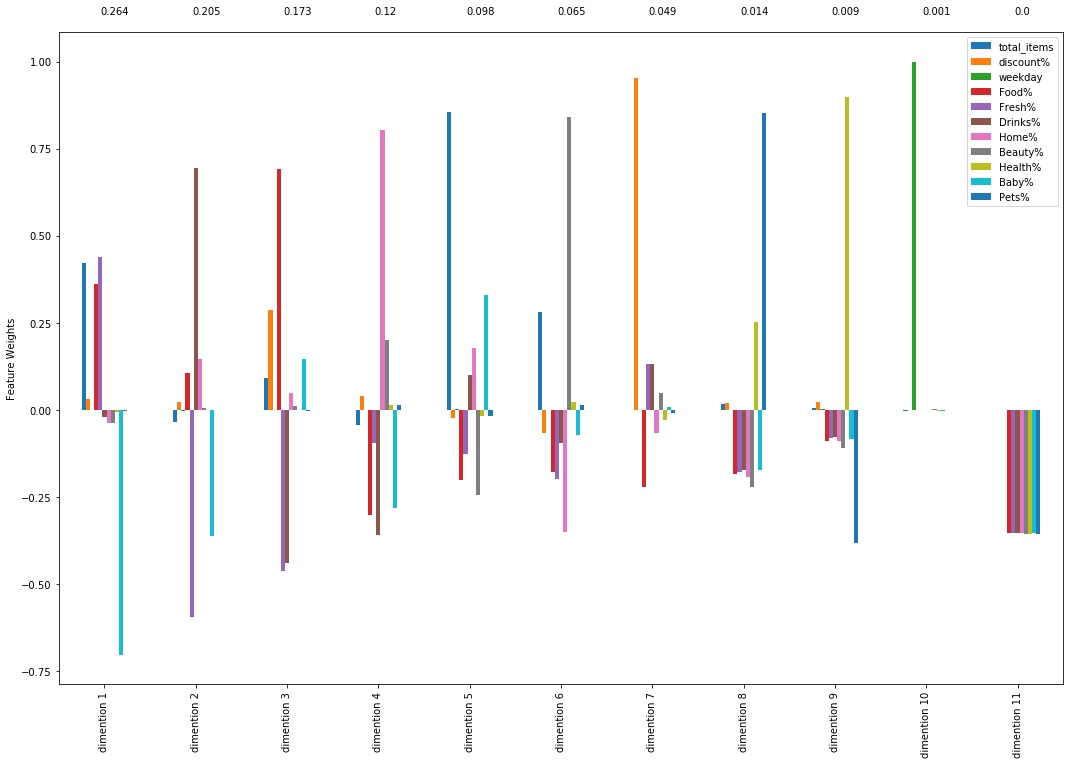

In [12]:
pca_results(pca, df)

This function accepts pca object and data frame as arguements and plots the scatter plot of first four principal components.

In [13]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    plt.show()

<Figure size 720x720 with 0 Axes>

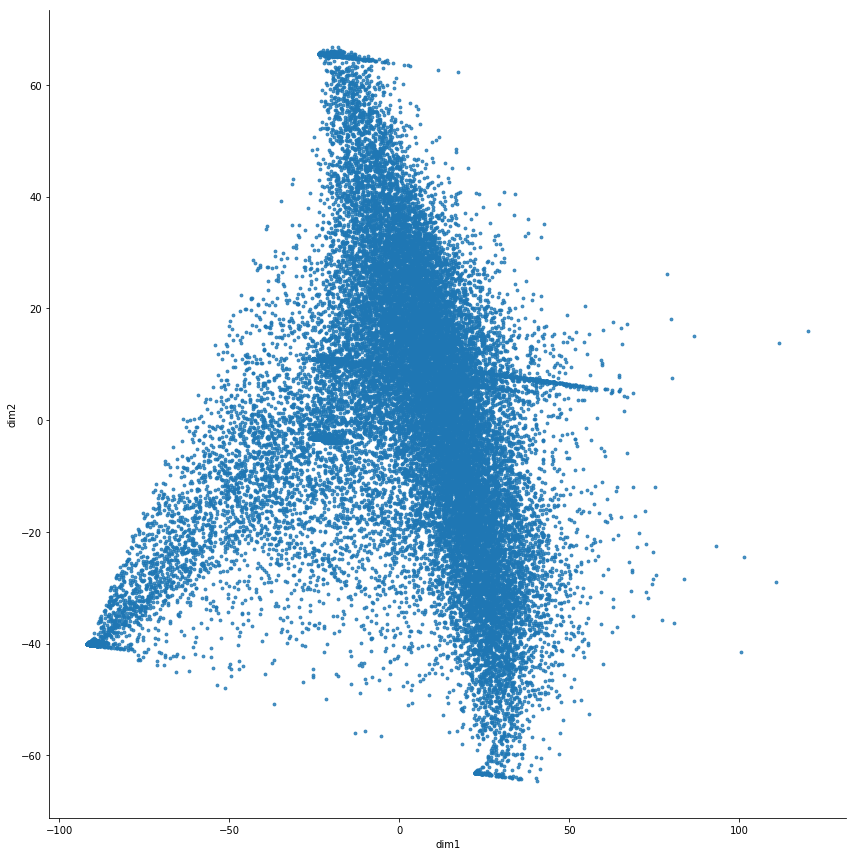

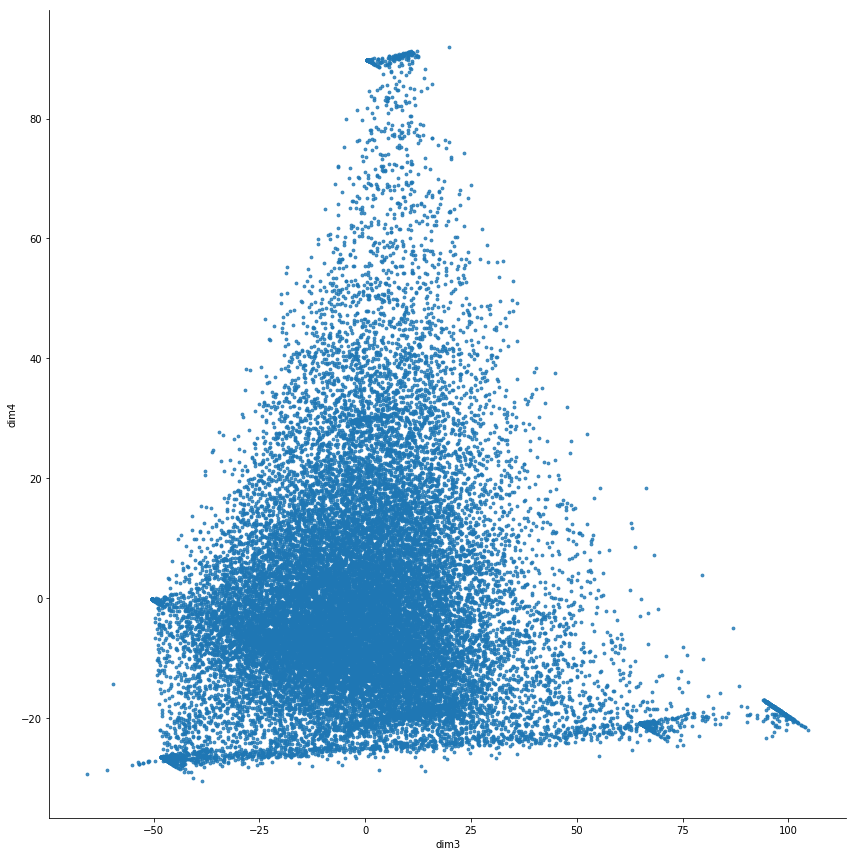

In [14]:
pca_2d_plot(pca, df)

Now let's plot the pairplots and see the variations and distributions of features with respect to each other.

<Figure size 1440x1440 with 0 Axes>

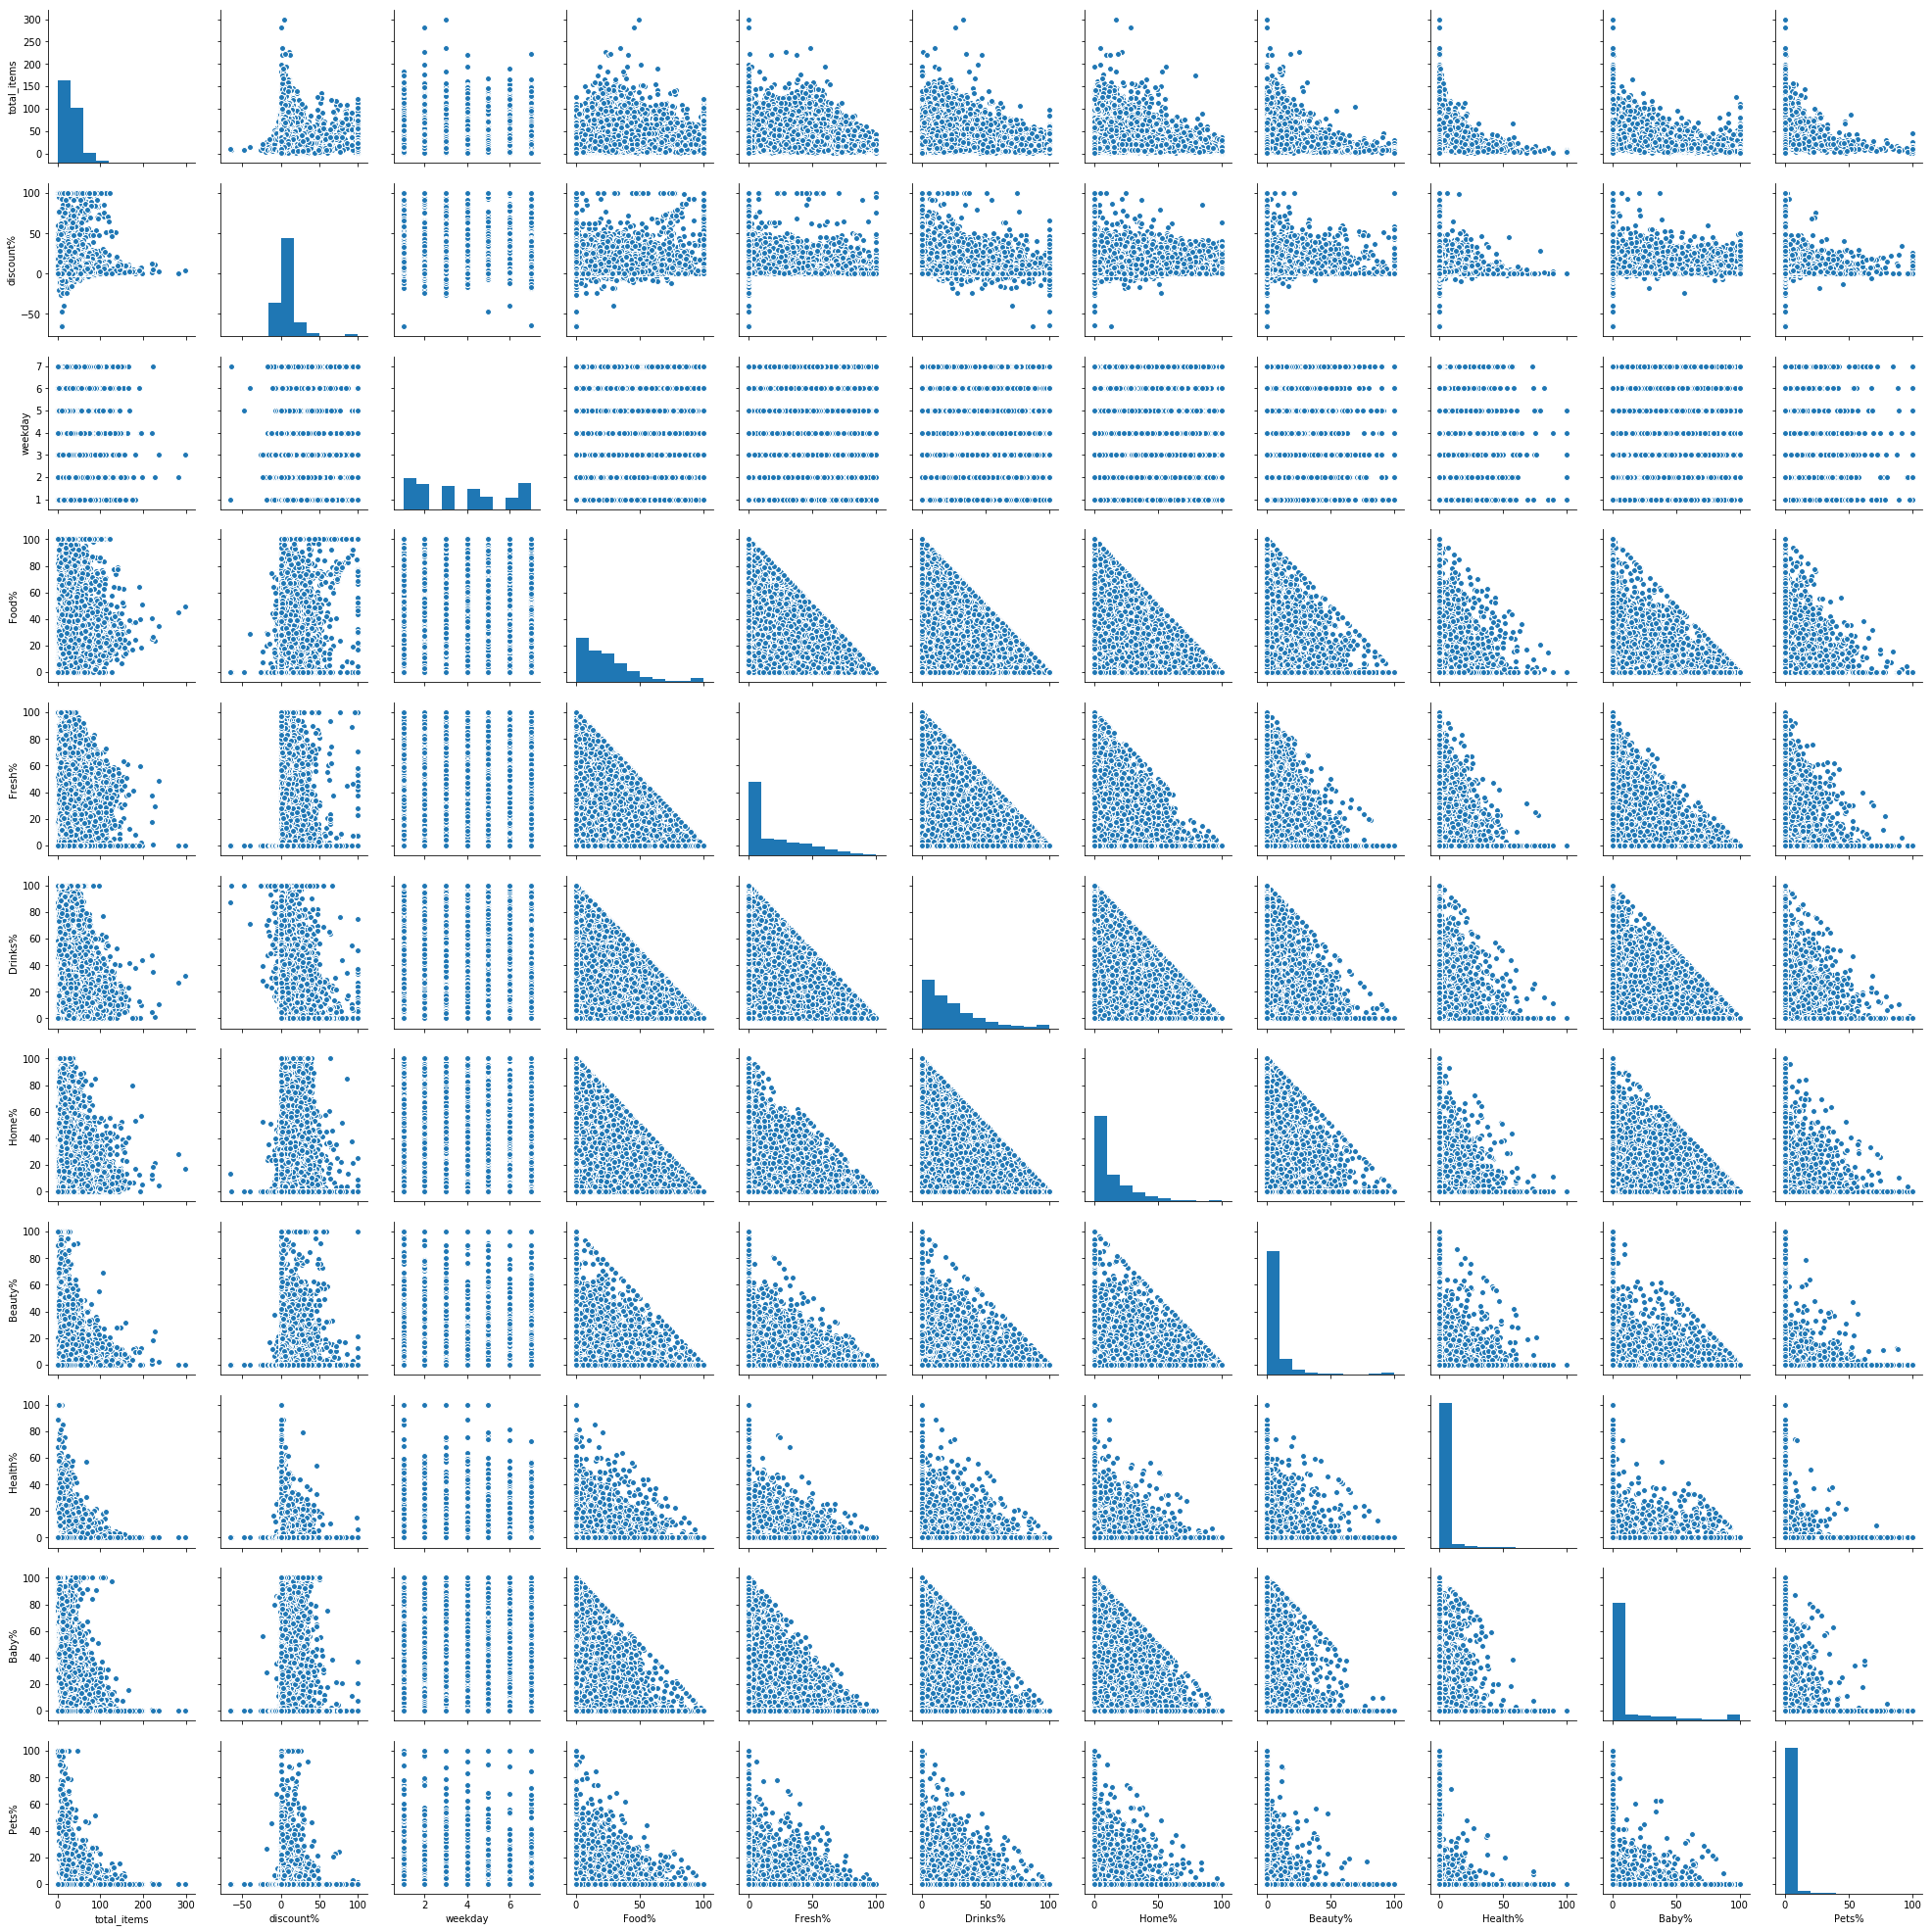

In [15]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

-> total_items is skewed, applying a log transformation will help the clustering.<br>
-> when discount% increases total_items icreases which makes sense, people will buy more on discount.<br>
-> below the 0 discount line only Drinks% has non zero percentage entries. Food%, Fresh% etc. have only zero percentage entries in negative discount area.<br>
-> it makes sense that the plots in the right bottom are bound by the line x+y = 100, as the data is actually in percentage x+y <= 100.<br>
-> the distribution plots are more and more skewed as we move towards the right bottom, as pet products, baby products and health products are brought by very less people.

### 4) Checking Dependant Variables

This function takes the data frame as arguement and prints R2 score of model trained with each feature as target. This is a good method to identify the dependant variables from our dataset. This can be used in other contexts as well.

In [16]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [17]:
dependant_variable_detector(df)

/home/hari/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hari/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hari/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hari/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Using total_items as dependent variable R2 score is :0.15848816407725963
Using discount% as dependent variable R2 score is :0.12779784963128127
Using weekday as dependent variable R2 score is :0.0019194529930831594
Using Food% as dependent variable R2 score is :0.9925724183188357
Using Fresh% as dependent variable R2 score is :0.9937312704627193
Using Drinks% as dependent variable R2 score is :0.9930865737794142
Using Home% as dependent variable R2 score is :0.9889948946530749
Using Beauty% as dependent variable R2 score is :0.9827301055344402
Using Health% as dependent variable R2 score is :0.888319659143346
Using Baby% as dependent variable R2 score is :0.994269557581205
Using Pets% as dependent variable R2 score is :0.9155244182728488


In [18]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

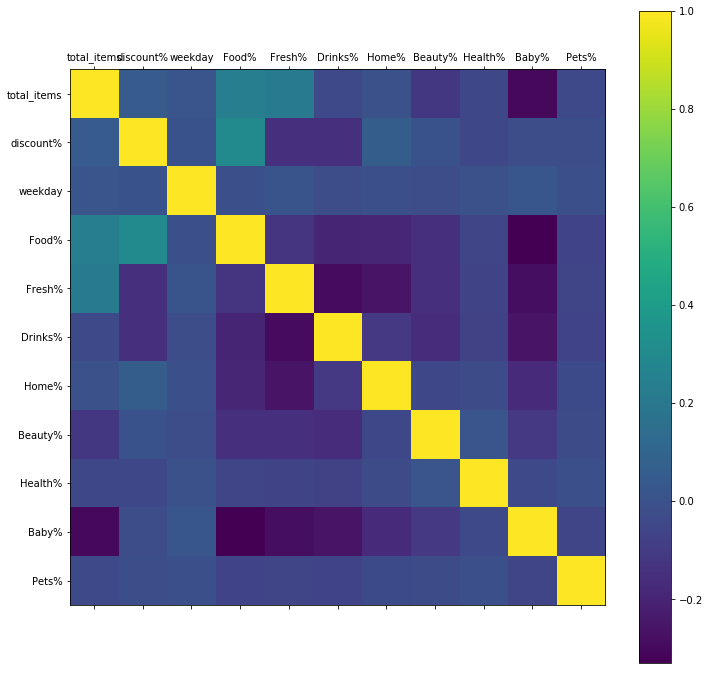

In [19]:
plot_corr_matrix(df)

-> The high R2 score in the case of Food%, Fresh% etc. does not mean they don't contain any information individually.<br>
-> The high R2 score is owing to this relationship Food% + Fresh% + .......+ Pets% = 100, the regression model has learned it.

### 5) Outlier detection

/home/hari/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


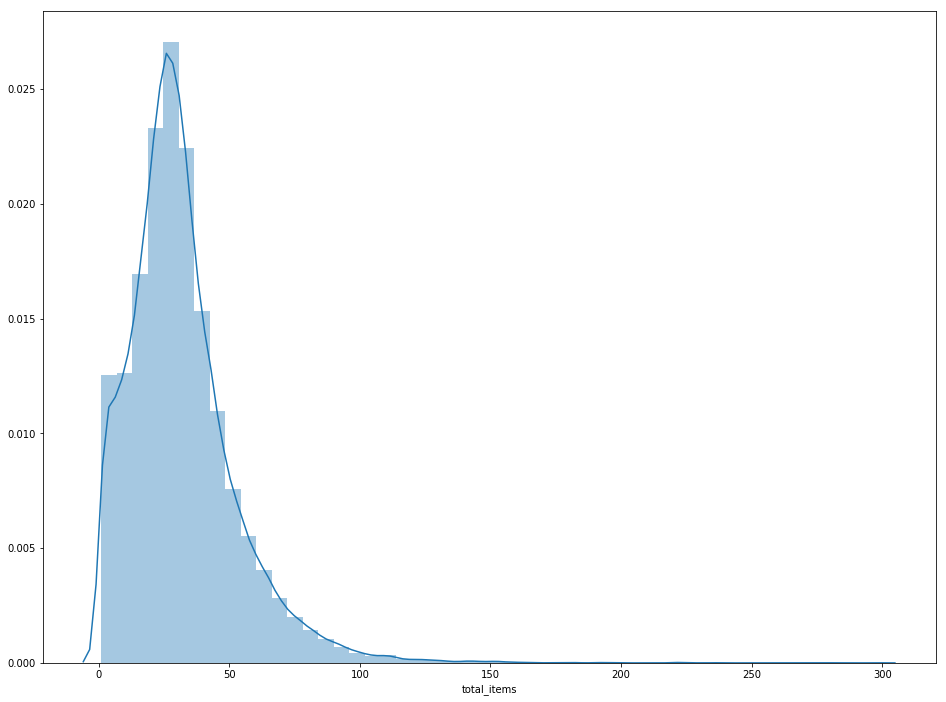

In [20]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

This distribution is skewed negatively, let's apply a log transformation.

/home/hari/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


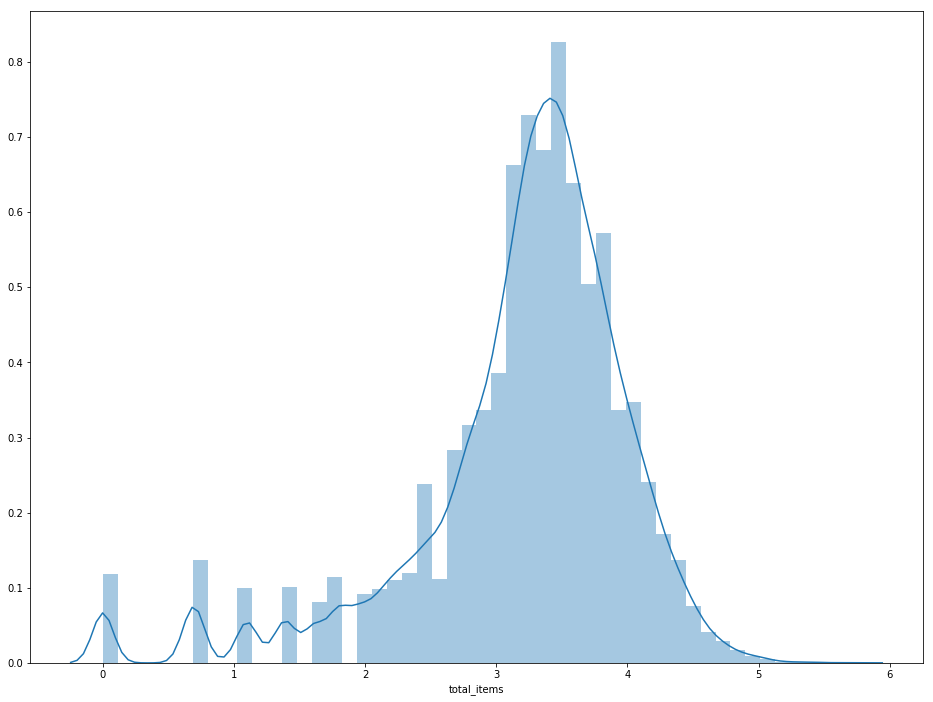

In [21]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

That's better

#### Turkey Outlier Detection

-> According to Turkey method a point is an outlier if it lies 1.5 times inter quartile distance to the right of third quartile or if it lies 1.5 times inter quartile distance to the left of first quartile.<br>
-> For more info refer: https://en.wikipedia.org/wiki/Outlier

This function takes df as an arguement and columns for which outlier detection has to be done, as an optional arguement. It returns a dictionary whose keys are column names and elements are indices of outlier points in the corresponding columns. It also prints the number of outliers in every column.

In [22]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [23]:
outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->1899
_________________________
discount%-------->2337
_________________________
weekday-------->0
_________________________
Food%-------->1221
_________________________
Fresh%-------->254
_________________________
Drinks%-------->1386
_________________________
Home%-------->1432
_________________________
Beauty%-------->2901
_________________________
Health%-------->30000
_________________________
Baby%-------->6403
_________________________
Pets%-------->30000


-> The outliers in Health% and Pets% are due to the fact that, lot people don't buy these products and the entries are mostly 0.<br>
-> The outliers in Food%, Fresh% etc. are due to the 0% and 100% entries which is a completely natural phenomenon in this scenerio.<br>
-> The outliers in discount% is also due to 0% and 100% entries.<br>
-> For these features let's acknoledge the fact that there are outliers and leave it there.<br>
-> Let's remove the outliers in total_items.

In [24]:
df.drop(outlier_indices['total_items'], inplace=True)

In [25]:
frame.drop(outlier_indices['total_items'], inplace=True)

## 6) Are there clusters in the data, how many clusters?

#### Elbow Method

-> The first method we are going to try is the elbow method.<br>
-> In this method we plot the sum of distances of all the data points to the correspoding cluster centeroids vs number of clusters, for a range of number of clusters.<br>
-> If there is a elbow in the plot the point at which elbow occured is the number of clusters present in the data.<br>
-> We are lucky if we see an elbow in the plot, but in most cases the plot will just be smooth revealing no information about the number of clusters.<br>

In [26]:
from sklearn.cluster import KMeans

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X = scaler.fit_transform(df.values)

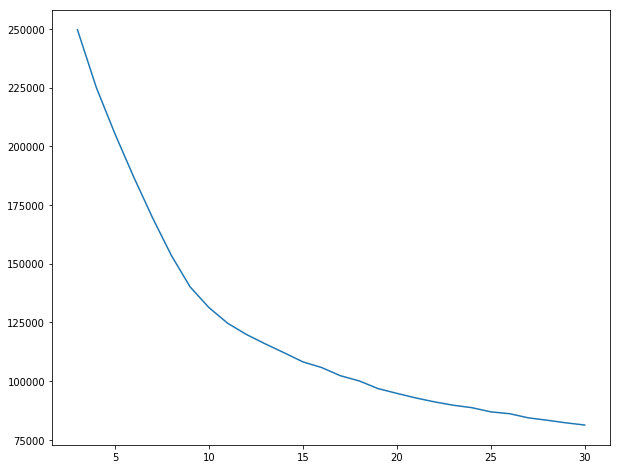

In [29]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

We got lucky! There is somewhere around 10 clusters in the data.

#### Hopkins Statistic

1) For every data point in the given data, calculate nearest neighbor distance and take it's sum. Let this be s.<br>
2) Generate random data in the same shape as the given data.<br>
3) For the random data calculate the nearest neighbor distance and take it's sum. Let this be r.<br>
4) Hopkins statistic score = s/(s+r).<br>
5) The intuition is, if the sample data has clusters in it, the nearest-neighbor-distance-sum of sample will be very much smaller than that of random data.<br>
6) A very small Hopkins statistic score means the data has very good clusters.<br>

In [30]:
def hopkins_statistic(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25,0.5,0.75]]
    states = [123,42,67,248,654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state=random_state)
            nbrs = NearestNeighbors(n_neighbors=2)
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1]
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist+random_dist)
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic :'+str(hs))
        print('mean hopkins statistic :'+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

In [31]:
hopkins_statistic(df)

------------7025------------
*************************
hopkins statistic :0.6208435745463363
*************************
hopkins statistic :0.6199720802438359
*************************
hopkins statistic :0.6191260008879048
*************************
hopkins statistic :0.619900030377953
*************************
hopkins statistic :0.6165017885123798
mean hopkins statistic :0.619268694913682
hopkins statistic standard deviation :0.0014865876272208787
------------14050------------
*************************
hopkins statistic :0.6068891093534554
*************************
hopkins statistic :0.6089050759355955
*************************
hopkins statistic :0.6083258918217358
*************************
hopkins statistic :0.6077983884420284
*************************
hopkins statistic :0.6078994472734349
mean hopkins statistic :0.6079635825652501
hopkins statistic standard deviation :0.000663863371576889
------------21075------------
*************************
hopkins statistic :0.6019234584471206
****

We take different number of samples from the data and generate random data with different seeds and calculate hopkins statistic for each. The Hopkins statistic score is bad. Let's proceed with the analysis..

#### Kth Nearest Data point

-> Calculate the sum of distances of kth nearest neighbor of all the data points in the given data.<br>
-> Plot the value of the sum against k.<br>
-> If there is a sharp decline in the rate of change of y at some value of k, then there are clusters in the data.<br>

In [32]:
def kth_nearest_data_point(df, k_max):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    ks = range(1,k_max+1)
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)
    nbrs = NearestNeighbors(n_neighbors=k_max)
    nbrs.fit(X)
    kneighbors_result = nbrs.kneighbors()[0]
    kth_neighbor_dist = list(np.sum(kneighbors_result, axis=0))
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, kth_neighbor_dist);
    plt.show()

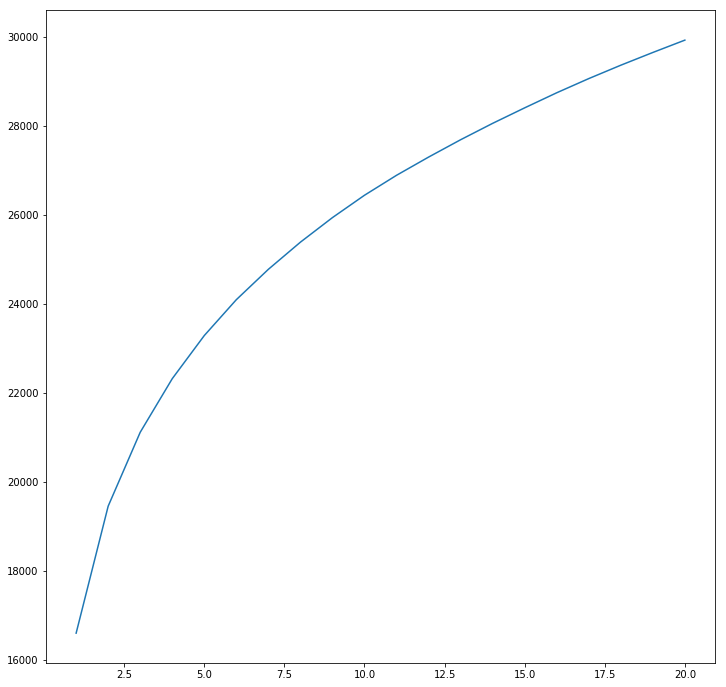

In [33]:
kth_nearest_data_point(df, 20)

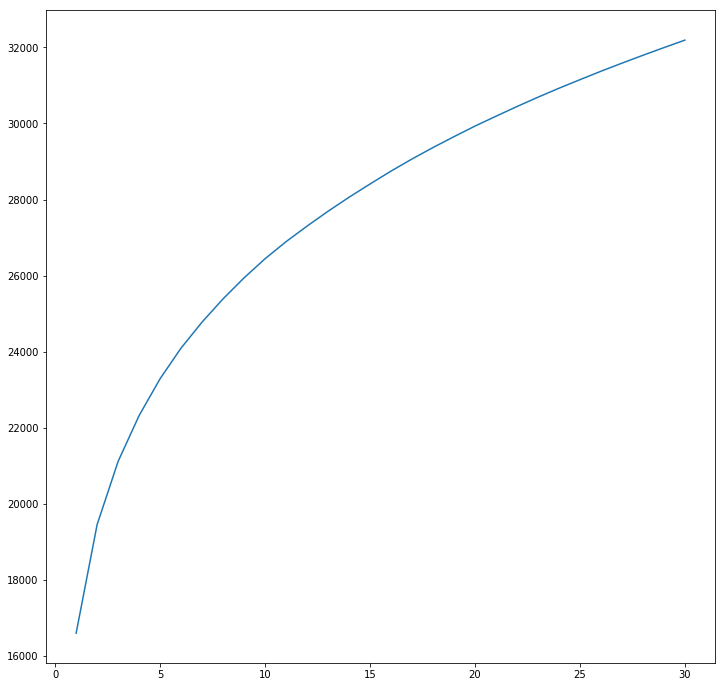

In [34]:
kth_nearest_data_point(df,30)

#### Silhoutte Score

-> a(i) is the sum of the sum of distances of the ith data point to the other data points in it's cluster.<br>
-> Calculate the sum of distance of ith data point to the points in every other cluster.<br>
-> b(i) is the sum of distances from ith data point to all points in a cluster, for which sum of distances is munimum.<br>
-> silhoutte score, s(i) = 1-a(i)/b(i)<br>
-> If a data point is more similar to it's own cluster and very much different from other clusters, then 
a(i)<<b(i), greater will be the silhoutte score.<br>
-> The silhoutte score we plot is the average of it over all the data points.<br>

In [35]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

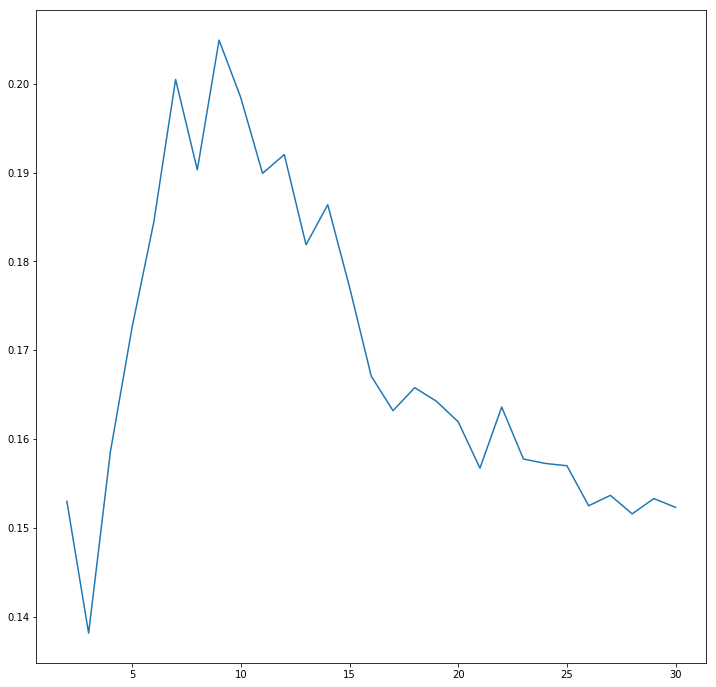

In [36]:
plot_silhoutte_score(X,30)

We plot number of clusters vs silhoutte score, the silhoutte score hits it's maximum at around 10 clusters.

#### Soft clustering

-> In soft clustering every point is a part of every cluster with a certain probability.
-> Gaussian Mixture Model is a soft clustering algorithm which uses Estimation Maximization algorithm to learn the parameters.
-> The following function finds the best covariance type and number of components based on bayesian information criterion.

In [37]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components+1)
    cv_types = ['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm
        
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return best_gmm

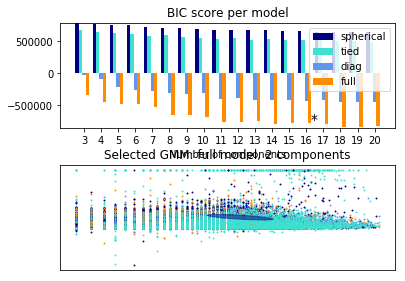

In [38]:
gmm = ncomponents_of_gmm(X, 3, 20)

### Validity Index

-> When the number of clusters is less than the correct number of clusters then the data is under partitioned, if the number of clusters is more than the correct number of clusters then the data is over partitioned.<br>
-> Sum of distances from the data points to the corresponding cluster centers is a measure of under partition.<br>
-> Number of clusters devided by minimum distance between two clusters is a measure of over partition, it increases when the data is more over partitioned.<br>
-> A normalized sum of these two can help finding the actual number of clusters.<br>
-> This idea is published in this paper:http://armi.kaist.ac.kr/korean/files/_2001______________________a_novel_validity_index_for_determination_of_the_optimal_number_of_clutters_.pdf

The same has been implemented in the following functions.

In [39]:
def under_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    ks = range(1,k_max+1)
    UPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        UPM.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(14,14))
    ax.plot(ks, UPM);
    plt.show()
    return UPM

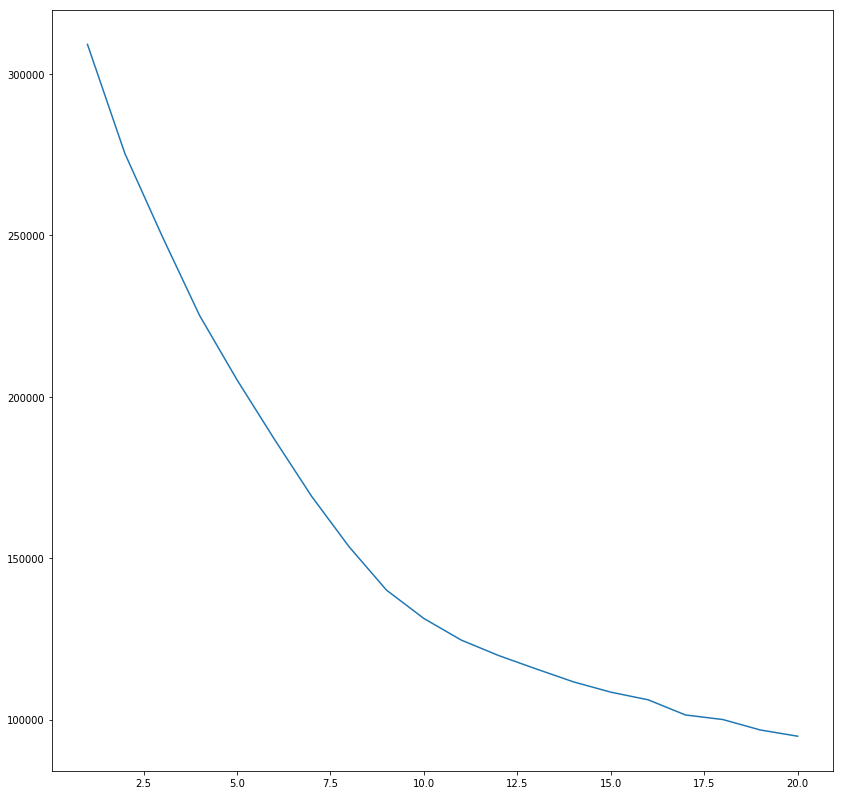

In [40]:
_ = under_partition_measure(X, 20)

This is same as the elbow we saw before.

In [41]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import  pairwise_distances
    ks = range(1,k_max+1)
    OPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1,-1), pair[1].reshape(1,-1), metric='euclidean')
            if d<d_min:
                d_min = d
        OPM.append(k/d_min)
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, OPM)
    plt.show()
    return OPM

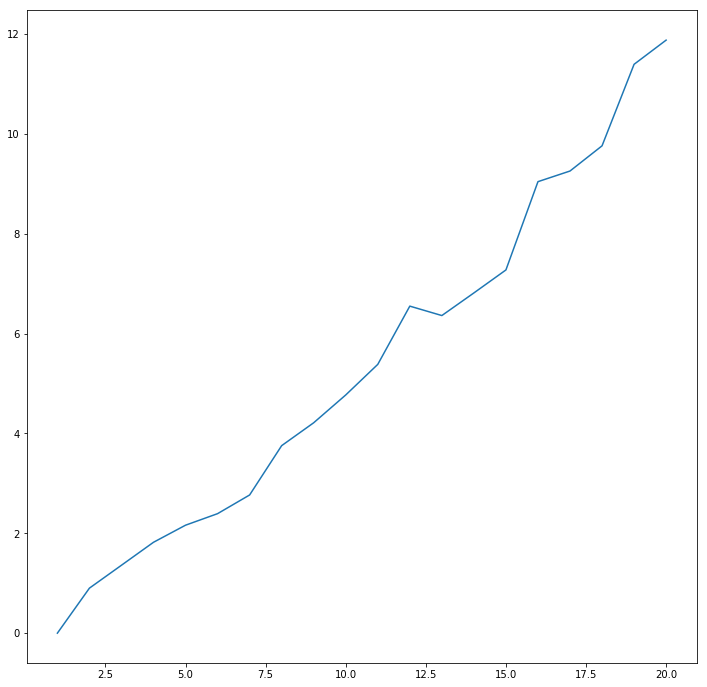

In [42]:
_ = over_partition_measure(X, 20)

In [43]:
def validity_index(X, k_max):
    UPM = under_partition_measure(X, k_max)
    OPM = over_partition_measure(X, k_max)
    UPM_min = np.min(UPM)
    OPM_min = np.min(OPM)
    UPM_max = np.max(UPM)
    OPM_max = np.max(OPM)
    norm_UPM = []
    norm_OPM = []
    for i in range(k_max):
        norm_UPM.append((UPM[i]-UPM_min)/(UPM_max-UPM_min))
        norm_OPM.append((OPM[i]-OPM_min)/(OPM_max-OPM_min))
        
    validity_index = np.array(norm_UPM)+np.array(norm_OPM)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,k_max+1), validity_index)
    return validity_index

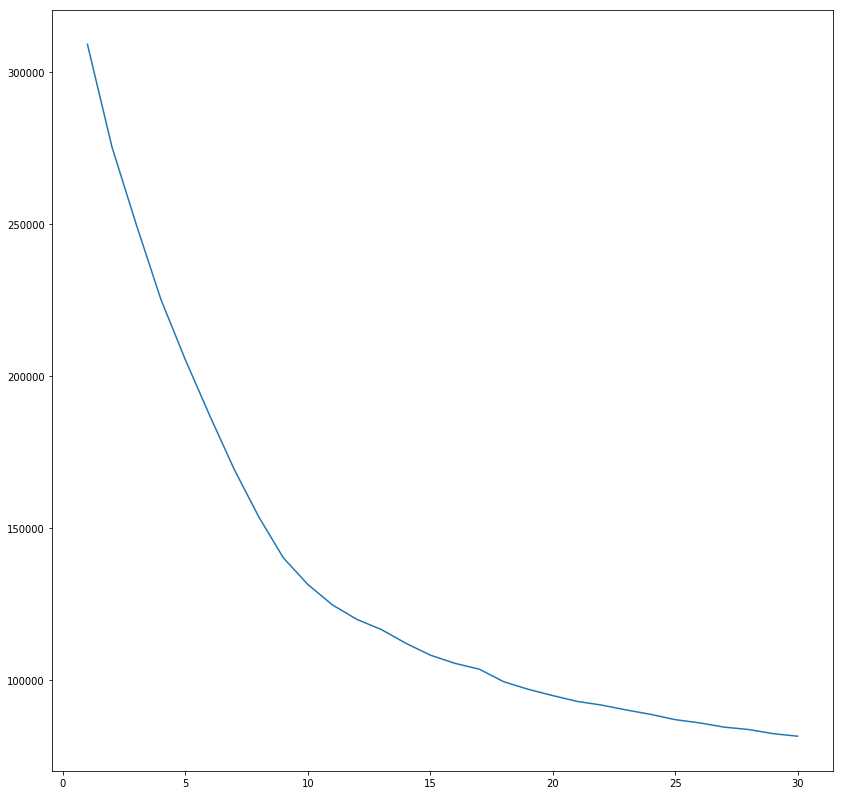

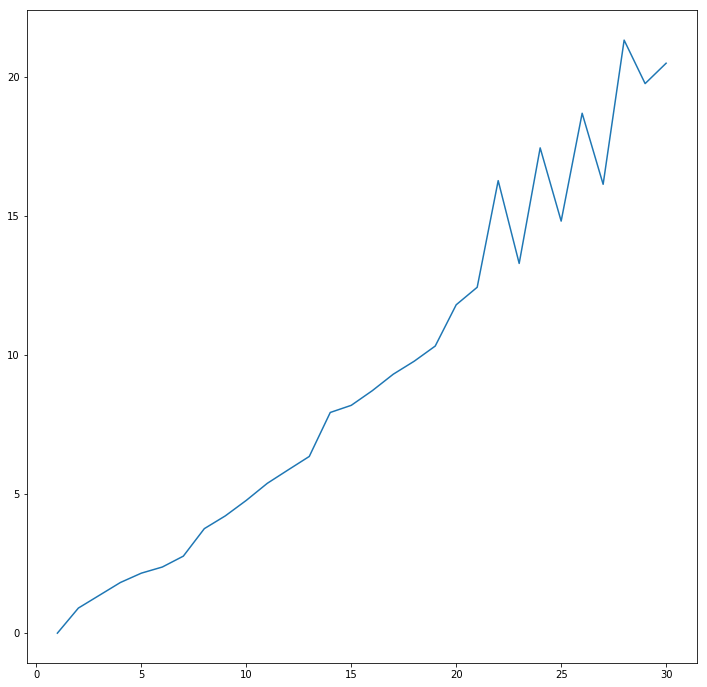

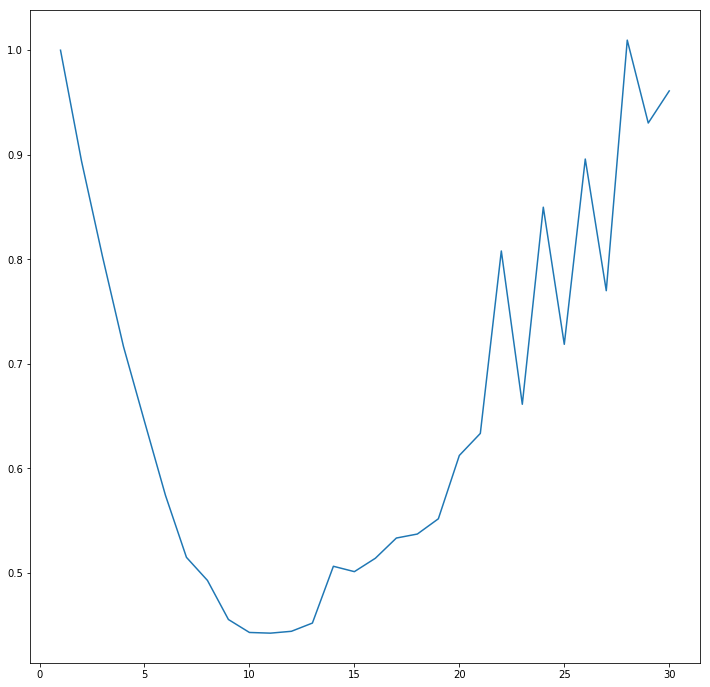

In [44]:
_ = validity_index(X, 30)

This again gives us a surety that, there are around 10 clusters.

All our analysis so far suggests there could be around 10 clusters in the data, let's now manually examine and try to interpret the meaning of these clusters.

### 7) Clustering and interpretation

In [45]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

In [46]:
frame[frame['labels']==0]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
107           9    107           29       8.02        7    10  25.62   19.48   
111          10    111           23      15.94        1    19   9.37    0.00   
112          10    112           26       6.93        3    22   4.93    0.00   
152          22    152           31       5.19        7    16   9.96   13.96   
158          25    158           23       1.30        2    19   1.74   18.27   
192          37    192           27      19.17        3     8  15.96    0.00   
193          37    193           21      12.68        3    16   0.00    0.00   
194          37    194           19       9.14        1    10   8.93    0.00   
205          41    205           42      26.01        4    22  24.22   25.01   
258          52    258           10      30.64        7    21   0.00    0.00   
343          69    343           16      13.51        4     8   5.34   44.42   
380          77    380           18       1.05        7    12   2.23    0.00   
382          77    382           27       1.04        1    23  11.57    7.50   
384          77    384           11       4.36        1    12  18.95    0.00   
407          87    407           27      16.46        5    12  33.38    0.00   
408          87    408           34      30.89        2    19  11.31    0.00   
410          87    410           40      10.35        6    15  19.54    0.00   
411          87    411           36      12.21        3    23  45.60    0.00   
412          87    412           26      11.45        3    23  50.09    0.00   
459         109    459           34       7.66        1    19  21.65    0.00   
462         109    462           11       4.77        2    11  13.54    0.00   
463         109    463           10       7.66        7    22  14.43    0.00   
465         110    465            7      15.73        7    20  15.93    0.00   
497         114    497           25      15.49        2    17   9.75   18.40   
514         119    514           21      16.80        2    19  22.71    0.00   
528         122    528           26      15.49        7    12   0.00    0.00   
545         125    545           15      60.47        7    23   2.65   20.54   
582         142    582            8       1.19        1    11   0.00    0.00   
590         145    590           12       0.66        2    11   0.00    0.00   
592         145    592           15       4.51        5    19   7.48    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29340      9946  29340           14       7.61        3     0  23.22   42.49   
29365      9953  29365           25       5.15        1    13   8.99    0.00   
29386      9963  29386           10      21.54        7    17  13.30   21.27   
29428      9976  29428           45       0.82        5    23  21.06    0.00   
29517     10014  29517           18       1.88        3    17   4.98    3.08   
29537     10024  29537           34       3.29        1    20  36.63   31.33   
29544     10026  29544           15       6.13        3    12  12.64   40.07   
29579     10036  29579           25      17.54        1    11  35.85    0.00   
29625     10059  29625            8       3.24        1     0   9.22    0.00   
29709     10097  29709           33       4.79        1    20  34.72   18.81   
29723     10105  29723           52      18.07        1    22  22.28    0.00   
29780     10134  29780           12       4.54        4    13   9.84    0.00   
29781     10135  29781           25       2.36        5    12  29.21    6.56   
29812     10154  29812            7       0.00        5     0   0.00   20.82   
29813     10154  29813            7       2.00        3    14   0.00   19.80   
29816     10156  29816           17       2.53        2    11   0.00    8.63   
29822     10158  29822           38      15.56        5    20  29.03   24.57   
29827     10161  29827            8      27.45        2    11   2.66    4.03   
29829  

In [47]:
frame[frame['labels']==0].describe()

customer         order  total_items    discount%      weekday  \
count   1097.000000   1097.000000  1097.000000  1097.000000  1097.000000   
mean    4417.849590  13210.742935    25.379216    11.580046     3.748405   
std     3021.209281   9020.636240    13.722625    11.982619     2.138575   
min        9.000000    107.000000     6.000000    -7.810000     1.000000   
25%     1660.000000   4975.000000    16.000000     2.680000     2.000000   
50%     3946.000000  11692.000000    24.000000     7.850000     3.000000   
75%     7005.000000  20959.000000    31.000000    16.070000     6.000000   
max    10227.000000  29979.000000   139.000000    61.860000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  1097.000000  1097.000000  1097.000000  1097.000000  1097.000000   
mean     14.927074    15.995132     8.492470    15.233227    13.904385   
std       5.838783    13.925984    12.994031    14.472425    14.457493   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     3.650000     0.000000     0.000000     0.000000   
50%      15.000000    14.290000     0.000000    12.170000     9.730000   
75%      20.000000    24.720000    14.710000    23.920000    24.090000   
max      23.000000    73.090000    68.770000    69.630000    65.060000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  1097.000000  1097.000000  1097.000000  1097.000000  1097.0  
mean     40.999836     0.856600     3.884968     0.375880     0.0  
std      19.331633     3.194885    10.415330     2.282861     0.0  
min      19.230000     0.000000     0.000000     0.000000     0.0  
25%      28.220000     0.000000     0.000000     0.000000     0.0  
50%      33.610000     0.000000     0.000000     0.000000     0.0  
75%      46.380000     0.000000     0.000000     0.000000     0.0  
max     100.000000    24.790000    63.450000    24.090000     0.0

-> These class of people seem to order beauty products a lot.<br>
-> They must be beauty concious people, let's call them beauty concious.

In [48]:
frame.loc[frame['labels']==0, 'class'] = 'beauty_concious'

In [49]:
frame[frame['labels']==1]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
11            1     11            7      15.00        1     8   0.00   39.93   
96            8     96           32      24.44        4    22   7.18   33.83   
140          18    140           16      21.57        4    13   1.69   36.07   
164          27    164           15       8.69        7    11  31.68    0.00   
165          27    165           23       0.00        7    12  25.35    6.84   
184          33    184           28       4.09        3    15  15.20   19.15   
195          38    195           22       0.00        4    12  21.81    6.09   
196          38    196           24       1.01        4    11  23.40    7.24   
197          38    197           25       0.00        3    13   7.41   14.49   
220          45    220           20       3.66        1    14   0.00    3.89   
221          45    221           21       1.01        1    18  16.52    3.00   
250          50    250           25       8.83        7    22  14.89   18.35   
251          50    251           32      14.57        3    22  16.01   21.11   
252          50    252           26       6.60        6    22  14.50    7.97   
292          57    292           39       5.65        4    20   6.03    4.07   
293          58    293           17      13.75        3    14  12.55    0.00   
294          59    294           34      11.39        1    13   0.00    0.00   
342          69    342           23      10.64        3    18  26.87   27.63   
362          74    362            6      10.06        3    11   0.00    0.00   
383          77    383            7       4.16        1    23   0.00    0.00   
390          80    390           22       4.60        1     8  18.01    6.30   
392          81    392           28      17.93        3    23   4.35    0.00   
404          85    404           13       1.40        4    22  10.14    8.11   
414          87    414           39       6.19        6    11  29.60    0.00   
432          97    432           19      22.14        7    23  30.34    0.00   
446         104    446           29       0.00        5     9  12.13    5.67   
451         106    451           12       6.44        4    20  20.26    0.00   
460         109    460           12       1.84        3    16  24.47    0.00   
555         132    555           29       4.89        6    13  19.38    0.00   
564         136    564            9       2.47        1    13   0.00    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29662     10071  29662           18       0.00        3    10   7.97    0.00   
29663     10071  29663            9       0.00        4    17   0.00    0.00   
29699     10093  29699           14       0.00        3    21  18.94   19.65   
29703     10095  29703           23       1.04        3    13  10.11    0.00   
29704     10095  29704            9       0.00        1    19   0.00    0.00   
29722     10104  29722           26       0.85        1    20  27.90   10.66   
29726     10106  29726           35       7.31        1    21   3.54    0.00   
29729     10109  29729           75       4.76        2    13  23.64    0.00   
29752     10120  29752           25      10.24        2    23  22.02   22.64   
29764     10127  29764           10       0.00        2    11   0.00    0.00   
29765     10127  29765            7       0.00        3    11   0.00    0.00   
29777     10134  29777           16      20.80        2    13   2.71   19.17   
29779     10134  29779            7       0.00        3    16  10.89    0.00   
29783     10137  29783           12       0.00        2    13   0.00    0.00   
29789     10142  29789           47       0.62        2    16  10.89   12.34   
29797     10149  29797           39      40.39        3    22   4.35    0.00   
29815     10156  29815           10       3.92        6    15  43.65    0.00   
29838     10164  29838           35      11.12        5     9  21.32    0.00   
29887  

In [50]:
frame[frame['labels']==1].describe()

customer         order  total_items    discount%      weekday  \
count   3375.000000   3375.000000  3375.000000  3375.000000  3375.000000   
mean    4985.194074  14929.091852    23.466370     5.623449     3.399704   
std     2921.909781   8755.702937    11.719377     7.968055     1.879585   
min        1.000000     11.000000     6.000000   -65.150000     1.000000   
25%     2317.500000   6812.500000    15.000000     0.650000     2.000000   
50%     5017.000000  14943.000000    22.000000     3.500000     3.000000   
75%     7560.000000  22767.500000    30.000000     7.750000     5.000000   
max    10237.000000  29998.000000    98.000000    66.140000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  3375.000000  3375.000000  3375.000000  3375.000000  3375.000000   
mean     14.634370    12.260705     5.813004    69.100228     7.937674   
std       5.461207    11.790523     9.800932    17.993675    10.051207   
min       0.000000     0.000000     0.000000    19.490000     0.000000   
25%      11.000000     0.000000     0.000000    54.820000     0.000000   
50%      15.000000    10.300000     0.000000    65.110000     3.280000   
75%      19.000000    20.075000     9.170000    82.380000    14.035000   
max      23.000000    59.130000    55.780000   100.000000    43.230000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  3375.000000  3375.000000  3375.000000  3375.000000  3375.0  
mean      2.111416     0.219585     2.078089     0.297950     1.0  
std       4.798510     1.408660     6.938855     2.005163     0.0  
min       0.000000     0.000000     0.000000     0.000000     1.0  
25%       0.000000     0.000000     0.000000     0.000000     1.0  
50%       0.000000     0.000000     0.000000     0.000000     1.0  
75%       0.000000     0.000000     0.000000     0.000000     1.0  
max      29.400000    16.720000    45.820000    23.820000     1.0

-> These are the class of people who have ordered drinks a lot.<br>
-> These people had to face a lot of extra charges for drink purchases.<br>
-> They are potential customers, as we all know drinks can be addictive atleast in a teeny tiny level.

In [51]:
frame.loc[frame['labels']==1, 'class'] = 'drink_buyers'

In [52]:
frame[frame['labels']==2]

customer  order  total_items  discount%  weekday  hour   Food%  Fresh%  \
15            1     15           27      21.80        1     9   48.23   20.37   
24            3     24           28       2.21        1    10   36.51   31.93   
36            3     36            9       2.86        2    11   55.24   44.76   
43            3     43           20       0.41        2    13   65.64   12.36   
49            4     49            7       3.06        1    13  100.00    0.00   
57            4     57            6       3.48        4    12   89.37   10.63   
65            4     65            9       0.00        2    12   47.08   16.59   
71            4     71            9       7.22        1     7   64.64    0.00   
77            6     77           38       2.59        2    12   35.60   10.45   
78            6     78           49       4.07        1    11   52.00    9.61   
79            6     79           33       1.51        3     7   48.60   24.80   
80            6     80           40       6.94        1    12   33.75   31.10   
81            6     81           34       4.83        1    12   27.56   28.15   
82            6     82           34       1.87        1    14   29.61   29.89   
83            6     83           43       3.10        3    16   41.65   20.96   
84            6     84           45       2.31        4     9   36.86   25.95   
86            6     86           43       3.11        4    13   43.63   26.36   
87            6     87           39       0.89        3    11   39.99   20.91   
89            6     89           43       2.42        1    20   52.08   14.71   
92            8     92           25      18.59        4    12   41.34   26.76   
97            8     97           29      20.71        1    11   29.16   34.48   
113          11    113           50      16.42        1    11   30.41    8.28   
114          11    114           57      20.50        2    17   31.74    4.87   
116          11    116           34      16.08        2     8   44.73    3.24   
117          11    117           69      18.22        3    16   34.33    5.96   
122          12    122           46       3.63        1    14   30.12    0.68   
123          12    123           31       0.61        3    14   38.01    0.00   
129          14    129           25       3.50        1     9   48.91    7.19   
130          14    130           32       6.28        1    12   27.77   19.70   
131          14    131           27       1.16        1     9   56.44   18.25   
...         ...    ...          ...        ...      ...   ...     ...     ...   
29802     10149  29802           41      10.80        1     9   15.21    7.82   
29806     10151  29806           31       7.48        2    19   75.12    0.00   
29820     10158  29820           18      10.77        1    21   85.14   14.86   
29828     10161  29828           14      15.65        2    18   31.82   28.13   
29832     10162  29832           45       9.04        3    16   26.14    0.00   
29833     10162  29833           28       8.79        3    12   66.45    0.00   
29834     10162  29834           31       2.06        1    10   43.05    0.00   
29839     10165  29839           29      10.84        5    13   69.63    2.51   
29840     10165  29840           36       6.41        4    11   46.40   21.79   
29841     10165  29841           29       4.64        1    16   47.89   15.62   
29842     10165  29842           17       3.44        5    13   65.39    8.75   
29843     10166  29843           21       7.01        3    12  100.00    0.00   
29850     10169  29850           22      20.60        3    11   58.89   25.15   
29851     10169  29851           25       5.30        2    16   52.34   30.82   
29853     10171  29853           30       2.51        1    13   21.84    7.78   
29860     10175  29860           11       6.54        3    11   65.40   21.69   
29861     10176  29861           45       3.51        3    12   56.89   17.67   
29863     10178  29863           40   

In [53]:
frame[frame['labels']==2].describe()

customer         order  total_items    discount%      weekday  \
count   5559.000000   5559.000000  5559.000000  5559.000000  5559.000000   
mean    5053.183846  15129.349164    38.055586     6.055156     2.395755   
std     2922.822165   8763.537037    18.815442     7.227221     1.314747   
min        1.000000     15.000000     6.000000   -11.990000     1.000000   
25%     2546.000000   7505.500000    26.000000     1.485000     1.000000   
50%     5157.000000  15333.000000    34.000000     3.780000     2.000000   
75%     7522.000000  22657.000000    47.000000     7.915000     3.000000   
max    10231.000000  29989.000000   134.000000    51.900000     7.000000   

              hour       Food%       Fresh%      Drinks%       Home%  \
count  5559.000000  5559.00000  5559.000000  5559.000000  5559.00000   
mean     14.901241    45.81959    11.437494    23.133551    11.29973   
std       5.757808    19.87345    11.815458    13.668205    10.24920   
min       0.000000     4.14000     0.000000     0.000000     0.00000   
25%      11.000000    31.57000     0.000000    12.890000     0.75500   
50%      15.000000    42.26000     8.680000    22.870000     9.58000   
75%      20.000000    55.60000    21.180000    33.055000    18.78500   
max      23.000000   100.00000    44.850000    61.790000    49.81000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  5559.000000  5559.000000  5559.000000  5559.000000  5559.0  
mean      3.834274     0.536337     3.191398     0.618181     2.0  
std       5.713630     2.025779     8.223518     2.656320     0.0  
min       0.000000     0.000000     0.000000     0.000000     2.0  
25%       0.000000     0.000000     0.000000     0.000000     2.0  
50%       0.000000     0.000000     0.000000     0.000000     2.0  
75%       6.400000     0.000000     0.000000     0.000000     2.0  
max      29.540000    15.630000    52.070000    22.670000     2.0

-> These are again very loyal customers who depend on olabox for a lot of things.<br>
-> They tend to buy grocery a little more, let's call them loyals grocery.

In [54]:
frame.loc[frame['labels']==2, 'class'] = 'loyals_grocery'

In [55]:
frame[frame['labels']==3]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23            2     23           26       2.97        6    23  24.10   22.29   
55            4     55           23       5.81        7    21   0.00   53.76   
70            4     70           18      17.78        7    11  47.05   36.73   
85            6     85           46       0.49        7    15  42.61   32.52   
118          12    118           83       1.84        7    17  32.36    7.83   
128          14    128           26       7.74        7    22  44.64   30.76   
138          18    138           35      19.46        6    12  16.55   51.93   
160          25    160           38       4.24        7    21  13.09   34.00   
171          29    171           27       2.29        5    12  28.91   25.56   
173          29    173           47      10.00        7    20  12.29   17.27   
174          29    174           45       3.92        7    23  28.71   11.82   
178          31    178           46       7.69        7    19  28.84   26.56   
182          33    182           34       7.01        7    11   8.71   36.35   
185          33    185           29       1.98        7    22  52.45   19.14   
202          41    202           55      23.90        7    21   5.64   53.37   
212          42    212           44       6.70        7    16  12.68   30.62   
219          44    219           51       0.00        7    18  60.78    0.00   
224          47    224           39       1.09        7    18  15.04   18.39   
237          48    237           49      17.08        7    21  10.90   50.22   
248          50    248           31       9.73        7    12  29.80   14.55   
249          50    249           37       8.44        7    19  33.83   13.26   
253          50    253           36      14.68        7    19  16.77   21.14   
256          51    256           96       4.20        6    11  22.94   53.47   
259          53    259          103      19.17        6    22  49.48   23.97   
262          53    262           51      16.47        7    22  49.67   45.03   
264          53    264           61      16.45        7    18  48.84   44.59   
266          53    266           35      15.00        7    22  42.16   33.29   
267          53    267           66      18.44        7    23  43.28   41.61   
268          53    268           58      15.64        7    12  45.38   45.49   
270          53    270           48      20.32        7    21  41.35   46.19   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29600     10048  29600           50       6.84        7    20  24.79   56.02   
29601     10049  29601           28      34.40        7    21  46.10    0.00   
29602     10050  29602           67       4.72        7    21  13.86   50.43   
29604     10052  29604           63       9.43        7    12  35.64   16.47   
29609     10055  29609           44       9.68        7    16  29.81   60.84   
29613     10055  29613           46      29.63        6     9  59.01   22.79   
29618     10055  29618           36       4.48        7    12  27.13   57.56   
29619     10055  29619           38       2.68        7    15  36.01   56.38   
29632     10062  29632           12      28.01        7    12  35.47   26.32   
29636     10063  29636           28       2.17        7    22  57.41   37.39   
29701     10094  29701           10       0.00        7    17  57.33    0.00   
29710     10097  29710           23       3.74        7    21  12.02   53.89   
29714     10099  29714           34       8.39        4    18  14.03   10.89   
29719     10101  29719           17       5.16        7    17  47.49   35.14   
29737     10115  29737           33       4.54        7    16  19.65   30.91   
29748     10120  29748           32       1.84        7    22  28.93   33.18   
29790     10142  29790           50       2.54        4    18  20.33   26.88   
29798     10149  29798           59      37.42        4    21  20.85    6.11   
29800  

In [56]:
frame[frame['labels']==3].describe()

customer         order  total_items    discount%      weekday  \
count   5000.000000   5000.000000  5000.000000  5000.000000  5000.000000   
mean    4941.319600  14788.621000    42.394800     6.502936     6.251200   
std     2771.555988   8319.909641    19.521638     6.933782     1.013264   
min        2.000000     23.000000     7.000000    -8.070000     3.000000   
25%     2743.250000   7941.000000    29.000000     1.827500     6.000000   
50%     4855.500000  14487.500000    37.000000     4.370000     7.000000   
75%     7300.250000  21895.250000    51.000000     8.710000     7.000000   
max    10231.000000  29990.000000   140.000000    52.450000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     16.023400    27.962562    23.728686    23.152944    13.467662   
std       5.543843    13.862841    16.808455    13.300609    10.926539   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.000000    17.965000     9.360000    12.890000     4.270000   
50%      17.000000    26.730000    23.545000    21.440000    11.300000   
75%      21.000000    36.175000    36.195000    32.335000    21.180000   
max      23.000000    87.270000    66.200000    77.040000    47.980000   

           Beauty%     Health%        Baby%        Pets%  labels  
count  5000.000000  5000.00000  5000.000000  5000.000000  5000.0  
mean      5.189778     0.64051     5.101876     0.626314     3.0  
std       6.424175     2.28243    10.470260     2.666816     0.0  
min       0.000000     0.00000     0.000000     0.000000     3.0  
25%       0.000000     0.00000     0.000000     0.000000     3.0  
50%       2.640000     0.00000     0.000000     0.000000     3.0  
75%       8.772500     0.00000     2.917500     0.000000     3.0  
max      29.020000    15.84000    52.350000    22.800000     3.0

-> These customers buy all kinds of products from olabox, fresh, drinks and food dominnantly.<br>
-> These are the loyal customers of olabox who depends on olabox for everything. <br>
-> Let's call them loyals. <br>

In [75]:
frame.loc[frame['labels']==3, 'class'] = 'loyals'

In [57]:
frame[frame['labels']==4]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
76            5     76           21      11.76        2    23   6.84    0.00   
93            8     93           17      30.60        1    22  24.87    0.00   
119          12    119           21       3.13        4    23  23.02    3.20   
124          12    124           33       0.09        2    22  20.06    0.00   
135          15    135           25      10.98        7    14   0.00   12.29   
143          19    143           17      12.66        1    23  11.75   13.42   
148          21    148           17       0.81        3    20  18.39    0.00   
149          21    149           22       0.78        4    21  23.26    0.00   
151          21    151           22       0.74        1    21  15.56    0.00   
161          25    161           34       8.92        2    22  26.71   12.99   
162          26    162           25       0.00        1    18   6.88    0.00   
169          28    169            9      12.76        1    21  35.99    0.00   
170          28    170            8      17.93        6    13  24.11    0.00   
172          29    172           26       7.99        6    13  20.59    0.00   
176          29    176           54      12.39        3    22  10.09   14.87   
183          33    183           27       9.63        4    15  31.60   21.88   
189          35    189           18       3.13        7    20  22.46    0.00   
216          43    216           27       4.52        3    15   0.00    0.00   
217          43    217           29       5.61        1    17   0.00    0.00   
218          43    218           21       9.87        3    16   0.00    0.00   
223          46    223           26      23.84        4    19   0.00   13.08   
295          60    295           18       5.67        5    14  11.72    5.71   
313          62    313           11      24.63        1    11   0.00    0.00   
319          66    319           38       8.73        5     2  17.71    7.04   
344          69    344           14      24.30        4    10  23.19    4.76   
375          75    375            8       9.91        1    19  16.01   18.75   
378          76    378           24      20.57        1    13  23.28    0.00   
387          78    387           37      13.22        7    12   4.21   33.98   
401          83    401            8      10.08        2    19   0.00    0.00   
402          83    402           34      13.99        4    11  24.59    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29736     10115  29736           22       8.13        7    16   6.60   34.55   
29738     10115  29738           27      11.70        2    23  18.30   18.95   
29755     10123  29755           23       3.98        4    18  16.40    0.00   
29756     10123  29756           23       3.14        5    20  18.96    4.82   
29757     10123  29757           22       0.00        2    18  20.28    0.00   
29758     10123  29758           24       0.00        2    15  12.86    0.00   
29759     10123  29759           18       0.00        1    23  14.15    0.00   
29760     10123  29760           20       3.68        4    11  32.22    0.00   
29763     10126  29763            6       0.00        2    11   0.00    0.00   
29771     10130  29771           33      24.97        2    14   8.10    0.00   
29772     10131  29772           15       0.00        2    12   0.00    0.00   
29774     10132  29774            7      27.15        4    13   0.00    0.00   
29793     10145  29793           13      38.54        2    18   0.00    0.00   
29803     10149  29803           21      14.81        1    22   7.28   37.08   
29824     10159  29824           62       1.82        3    13   0.00    0.00   
29830     10161  29830            9      18.38        3    11  22.59   12.77   
29836     10163  29836            6       0.00        5    16   0.00    0.00   
29837     10164  29837           40      27.58        3     9  21.41    0.00   
29869  

In [58]:
frame[frame['labels']==4].describe()

customer         order  total_items    discount%      weekday  \
count   2807.000000   2807.000000  2807.000000  2807.000000  2807.000000   
mean    4446.505166  13298.703598    26.652654    12.696199     3.313502   
std     2909.215068   8696.324440    14.015091    10.347403     1.986243   
min        5.000000     76.000000     6.000000   -23.980000     1.000000   
25%     1949.500000   5779.000000    17.000000     4.495000     2.000000   
50%     4114.000000  12249.000000    24.000000    11.110000     3.000000   
75%     6850.000000  20548.000000    33.000000    18.610000     5.000000   
max    10230.000000  29987.000000   122.000000    86.090000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  2807.000000  2807.000000  2807.000000  2807.000000  2807.000000   
mean     14.752048    13.362586     5.625401    19.267243    52.790086   
std       5.561662    11.889817     9.856775    14.762551    17.860532   
min       0.000000     0.000000     0.000000     0.000000    20.080000   
25%      11.000000     2.330000     0.000000     6.345000    40.205000   
50%      15.000000    11.670000     0.000000    18.160000    48.270000   
75%      20.000000    21.110000     7.820000    30.630000    60.635000   
max      23.000000    60.010000    57.270000    58.240000   100.000000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  2807.000000  2807.000000  2807.000000  2807.000000  2807.0  
mean      4.359968     0.464157     3.585037     0.461329     4.0  
std       6.441717     1.997755     8.963667     2.551079     0.0  
min       0.000000     0.000000     0.000000     0.000000     4.0  
25%       0.000000     0.000000     0.000000     0.000000     4.0  
50%       0.000000     0.000000     0.000000     0.000000     4.0  
75%       7.470000     0.000000     0.000000     0.000000     4.0  
max      33.310000    15.230000    49.510000    22.210000     4.0

-> This should be the class of orders that buy a lot of home utility products like floor cleaner, curtains, washing powder etc.<br>
-> Let's call this people home decorators.

In [59]:
frame.loc[frame['labels']==4, 'class'] = 'home_decorators'

In [60]:
frame[frame['labels']==5]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0             0      0           45      23.03        4    13   9.46   87.06   
1             0      1           38       1.22        5    13  15.87   75.80   
2             0      2           51      18.08        4    13  16.88   56.75   
4             1      4           53      18.31        2    11  24.13   60.38   
5             1      5            8      23.89        4    13   0.00  100.00   
6             1      6           35      17.26        1    10  13.01   51.84   
7             1      7           12       6.61        4     8  17.21   67.93   
8             1      8           35      22.29        1    12  15.50   61.65   
9             1      9           44      20.39        2    12  15.29   44.11   
10            1     10           17      18.41        4     9  16.92   70.15   
12            1     12           30      18.86        1     9  22.90   40.36   
13            1     13           35      16.38        1    11  11.46   79.06   
14            1     14           32      17.41        1    10  13.37   45.57   
16            1     16           38      17.31        1    11  12.88   64.26   
17            1     17           28      18.76        1    11  14.57   43.42   
19            1     19           23      19.52        1    13  23.22   56.85   
20            1     20           30      17.89        2    11  14.62   32.77   
21            1     21           45      17.27        1    10  20.19   63.32   
25            3     25           67       4.19        7    21  12.47   68.13   
26            3     26           27       3.23        1    10  25.45   36.17   
27            3     27            6       0.00        2    20  12.50   67.74   
28            3     28           27       5.80        1    13   5.20   65.05   
29            3     29           19       0.00        4    12  28.26   56.40   
30            3     30           34       1.25        1    10  37.61   44.11   
32            3     32           64       2.62        4    12  10.91   68.73   
34            3     34           43       0.00        1    11  21.35   69.37   
35            3     35           41       0.60        1    12  23.57   48.00   
37            3     37           31       4.82        1    12  22.80   57.01   
39            3     39           28       0.48        5    12  42.37   50.97   
41            3     41            6       0.00        1    10   0.00  100.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29898     10194  29898           42       1.35        3    17  29.90   38.80   
29902     10196  29902           30       7.11        1    23   5.38   42.12   
29903     10197  29903           19       0.00        6    12  16.84   83.16   
29908     10199  29908           22       2.28        4    14  16.28   60.76   
29910     10199  29910           63       3.81        4    13  40.35   51.80   
29911     10199  29911           22       1.36        3    18  47.97   46.95   
29912     10199  29912           39      10.68        3    22  25.65   50.16   
29913     10199  29913           22       2.29        4    18  26.77   38.63   
29915     10199  29915           69       5.93        2    21  43.12   47.37   
29917     10199  29917           36      19.07        3    22  29.56   60.49   
29918     10200  29918           51       8.41        3    20  10.68   46.14   
29919     10200  29919           29       3.32        6    14  27.34   56.76   
29921     10200  29921           27       7.73        4    12  19.31   47.03   
29923     10200  29923           29       5.15        3    11  10.75   73.87   
29924     10200  29924           24       0.00        2    20   9.36   59.18   
29925     10200  29925           41       2.50        4    12  20.27   58.03   
29927     10200  29927           22       3.10        3    11  11.18   56.82   
29928     10200  29928           42       6.76        2    12   7.35   38.66   
29929  

In [61]:
frame[frame['labels']==5].describe()

customer         order  total_items    discount%      weekday  \
count   6158.000000   6158.000000  6158.000000  6158.000000  6158.000000   
mean    5392.132673  16144.654433    38.278500     5.281983     2.974180   
std     2788.696467   8385.315467    18.533376     6.695102     1.729606   
min        0.000000      0.000000     6.000000     0.000000     1.000000   
25%     3393.000000   9744.250000    26.000000     1.010000     1.000000   
50%     5653.000000  16827.500000    34.000000     3.040000     3.000000   
75%     7776.000000  23482.750000    47.000000     6.857500     4.000000   
max    10228.000000  29981.000000   139.000000    65.100000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  6158.000000  6158.000000  6158.000000  6158.000000  6158.000000   
mean     15.013316    18.546047    55.761752    13.446195     6.377795   
std       5.875556    10.744958    15.766719    10.450450     7.608589   
min       0.000000     0.000000    21.770000     0.000000     0.000000   
25%      11.000000    10.670000    43.620000     5.620000     0.000000   
50%      15.000000    17.720000    53.835000    11.695000     3.755000   
75%      20.000000    25.700000    66.090000    19.500000    10.160000   
max      23.000000    55.570000   100.000000    53.780000    44.100000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  6158.000000  6158.000000  6158.000000  6158.000000  6158.0  
mean      2.645607     0.488266     2.163332     0.504661     5.0  
std       4.541996     1.987373     6.491280     2.288554     0.0  
min       0.000000     0.000000     0.000000     0.000000     5.0  
25%       0.000000     0.000000     0.000000     0.000000     5.0  
50%       0.000000     0.000000     0.000000     0.000000     5.0  
75%       3.940000     0.000000     0.000000     0.000000     5.0  
max      26.250000    17.030000    48.620000    22.680000     5.0

-> This class of orders buy a lot of Food, Fresh and Drinks. With Fresh being more dominant.<br>
-> These orders might be a little valuable, as these orders cover Food%, Fresh%, Drinnks%, Home%.

In [62]:
frame.loc[frame['labels']==5, 'class'] = 'loyals_fresh'

In [63]:
frame[frame['labels']==6]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
33            3     33           36      15.02        1    12  27.55   22.82   
115          11    115           24      16.27        4    21  17.02    3.77   
120          12    120           26       0.53        5    13  29.91    3.33   
121          12    121           26       4.11        1    12  12.05    7.99   
125          12    125           40       2.09        3    15  23.18    0.00   
126          12    126           20       1.62        3    14  31.58    9.31   
175          29    175           39      10.03        7    23   8.76   14.39   
211          42    211           30       2.95        1     2  11.07   17.87   
214          42    214           24      11.07        3     1   1.68   22.30   
238          48    238            6      36.83        1     8   9.83    0.00   
274          55    274           25       0.81        1    16  29.17    0.00   
279          55    279           22       0.42        3    17   5.03   37.48   
280          55    280            9       0.48        3    17   9.64   29.57   
283          55    283           23       0.30        6    15   8.84   35.90   
288          55    288           14       0.14        3    21   2.90   18.06   
315          63    315            7       0.00        2     9   0.00    0.00   
317          65    317           13      19.25        7    13  12.43    0.00   
321          67    321           26       0.00        3    11   0.00   27.37   
349          70    349           17      27.05        1    15  19.01    0.00   
355          70    355           14      18.36        1    12  19.88   10.96   
379          77    379           20       0.86        1    11  20.83   15.74   
389          80    389           13       1.38        4    21  13.79    0.00   
430          96    430           13       7.85        2    12   3.50    0.00   
439         101    439           12       2.18        5     0   0.00    0.00   
440         101    440           20      15.57        1     0   0.00   10.17   
445         104    445           23       0.17        1    23   3.41   16.80   
450         105    450            6       0.00        6    12   0.00    0.00   
454         107    454           48       8.70        2     8   1.43   16.84   
530         123    530           19      19.20        1    15   0.00    0.00   
543         125    543            8      22.79        6     1   0.00   22.79   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29590     10043  29590            6      -2.49        7    11   0.00    0.00   
29591     10043  29591            6      -3.43        2    13   0.00    0.00   
29592     10043  29592            6      -2.49        2    14   0.00    0.00   
29598     10047  29598           17       4.63        7    19   2.61    3.96   
29631     10062  29631            9      36.71        1    11   8.39    1.56   
29640     10064  29640            9      34.67        1    10   0.00    0.00   
29688     10088  29688           19      13.77        6     9  23.50    9.15   
29690     10088  29690           16       1.00        6    23  16.57   17.53   
29694     10091  29694            9      26.67        1    16   0.00    0.00   
29695     10091  29695           12      29.31        1    13   1.79    0.00   
29696     10092  29696            9      33.40        1    17   0.00    0.00   
29705     10095  29705           21      25.51        7    23   0.00    0.00   
29706     10096  29706           22      25.61        1    18   9.87    0.00   
29745     10118  29745           18       2.07        1    21   0.00    0.00   
29767     10128  29767           41       0.92        3    22   0.00    0.00   
29768     10128  29768           42       0.00        1    12   0.00    0.00   
29782     10136  29782            8       0.00        3    20   0.00    0.00   
29794     10146  29794            6      25.02        3    11   0.00    0.00   
29874  

In [64]:
frame[frame['labels']==6].describe()

customer         order  total_items    discount%      weekday  \
count   2540.000000   2540.000000  2540.000000  2540.000000  2540.000000   
mean    4881.819291  14600.642126    18.259055     8.952535     3.656693   
std     2836.571103   8503.406488    11.166849     9.982061     2.225796   
min        3.000000     33.000000     6.000000   -23.890000     1.000000   
25%     2410.000000   7137.250000    10.000000     1.060000     2.000000   
50%     4889.000000  14586.000000    16.000000     4.770000     3.000000   
75%     7116.000000  21331.250000    23.000000    14.745000     6.000000   
max    10230.000000  29986.000000   126.000000    53.290000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  2540.000000  2540.000000  2540.000000  2540.000000  2540.000000   
mean     15.090945     7.452496     4.509677    12.885465     7.790343   
std       5.993629     9.193745     8.156862    12.310908    10.451027   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     0.000000     0.000000     0.000000     0.000000   
50%      15.000000     4.320000     0.000000    10.435000     3.050000   
75%      21.000000    11.960000     6.240000    20.842500    12.782500   
max      23.000000    57.680000    45.850000    56.030000    53.110000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  2540.000000  2540.000000  2540.000000  2540.000000  2540.0  
mean      2.482315     0.455811    64.021476     0.229728     6.0  
std       5.106256     2.238396    19.782920     1.744490     0.0  
min       0.000000     0.000000    26.030000     0.000000     6.0  
25%       0.000000     0.000000    47.342500     0.000000     6.0  
50%       0.000000     0.000000    59.885000     0.000000     6.0  
75%       2.787500     0.000000    79.645000     0.000000     6.0  
max      33.730000    18.970000   100.000000    25.040000     6.0

-> These class of people have brought baby products a lot.<br>
-> They must be couple with new babies, let's call them new parents.

In [65]:
frame.loc[frame['labels']==6, 'class'] = 'new_parents'

In [66]:
frame[frame['labels']==7]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
3             1      3           57      16.51        1    12  28.81   35.99   
18            1     18           31      16.49        1    12  24.27   33.09   
22            1     22           36      16.62        5     9  18.66   47.13   
101           9    101           15       6.27        7    10  18.10   62.86   
103           9    103           17       4.36        7    23   2.62   25.94   
106           9    106           19       1.84        1    11   0.00   58.39   
154          22    154           33       0.15        5    11  21.24   27.03   
179          31    179           61       2.01        1    18  22.56   20.08   
186          34    186           27      25.95        1    12  22.27    0.00   
222          45    222           17       0.76        3    18   6.00    4.54   
323          67    323           34       3.12        1    12  30.86   14.95   
331          67    331           33       0.00        4    12   1.60   18.72   
406          86    406           45       1.10        6    12  22.58   25.44   
417          90    417           16       4.02        7    15  12.06    0.00   
421          92    421           36       0.58        1     0  39.42    0.00   
443         103    443           34       0.00        4    18  52.49    0.00   
456         108    456           18       0.67        2    16  22.04   28.97   
549         127    549           33       4.41        2    15  42.06    0.00   
584         142    584           14       7.44        5    23   0.00    0.00   
620         156    620           27       1.69        1    15  11.32    0.00   
630         160    630           18       3.09        6    21  14.68   15.61   
633         160    633           12       6.45        5    14   0.00    9.30   
635         160    635           22      11.65        1    22   0.00    3.51   
659         168    659           26       1.63        3    14  49.90    0.00   
736         189    736           61       1.53        1    20  44.39   10.23   
741         189    741           59       1.38        1    20  29.98   15.04   
751         194    751           28       8.43        7    18  42.79    2.86   
761         197    761           18       0.00        1    10   5.71   26.66   
763         197    763           29       0.00        7    11  10.01   50.02   
765         197    765           20       0.00        6    12  30.87   27.54   
...         ...    ...          ...        ...      ...   ...    ...     ...   
28434      9502  28434           44       5.54        7     9  24.01    0.00   
28464      9515  28464           55       4.75        5    19  25.48    8.06   
28535      9552  28535           26      13.55        1    23  18.67   22.02   
28708      9634  28708            7       2.05        2    13   0.00    0.00   
28720      9642  28720           14       5.12        3     0  17.43    0.00   
28823      9696  28823           11      28.25        2    13  26.13    0.00   
28927      9750  28927           64       2.06        3    12  55.15    0.00   
28946      9763  28946           21      33.76        7    15  19.45    0.00   
28961      9769  28961           37       5.63        1    23  34.09   25.39   
28983      9777  28983           28       0.17        4    22   7.91   43.37   
29010      9791  29010           19       0.37        6    10  51.52   13.35   
29012      9793  29012           20       0.00        1    10   0.00   19.17   
29120      9849  29120           30      33.27        1    15  61.00    0.00   
29167      9872  29167           12       4.06        3     1   0.00    4.13   
29209      9895  29209           12       5.11        3    19  17.66    3.02   
29278      9925  29278            6       2.02        2    20  11.76    0.00   
29313      9937  29313           20       0.00        1     8   0.00    0.00   
29344      9948  29344           14       0.64        7    18  71.69    0.00   
29345  

In [67]:
frame[frame['labels']==7].describe()

customer         order  total_items   discount%     weekday  \
count    692.000000    692.000000   692.000000  692.000000  692.000000   
mean    4724.575145  14140.732659    25.368497    5.685405    3.722543   
std     2939.218998   8801.515781    13.700805    8.269615    2.130588   
min        1.000000      3.000000     6.000000   -5.540000    1.000000   
25%     2166.000000   6422.000000    16.000000    0.760000    2.000000   
50%     4801.000000  14300.500000    23.000000    2.830000    3.000000   
75%     7163.500000  21469.000000    32.000000    7.145000    6.000000   
max    10227.000000  29978.000000   113.000000   52.490000    7.000000   

             hour       Food%      Fresh%     Drinks%      Home%     Beauty%  \
count  692.000000  692.000000  692.000000  692.000000  692.00000  692.000000   
mean    14.761561   18.578179   12.153555   17.141301   11.73698    6.900737   
std      5.956142   14.786999   15.629796   15.208510   13.30753   10.076119   
min      0.000000    0.000000    0.000000    0.000000    0.00000    0.000000   
25%     11.000000    6.957500    0.000000    5.005000    0.00000    0.000000   
50%     15.000000   16.880000    4.125000   14.640000    7.63000    2.555000   
75%     20.000000   26.300000   21.870000   24.925000   18.49250   10.315000   
max     23.000000   77.690000   75.060000   81.140000   72.47000   65.470000   

          Health%       Baby%       Pets%  labels  
count  692.000000  692.000000  692.000000   692.0  
mean    26.752038    5.850564    0.817919     7.0  
std     13.752458   13.937072    3.534369     0.0  
min     12.800000    0.000000    0.000000     7.0  
25%     17.650000    0.000000    0.000000     7.0  
50%     22.125000    0.000000    0.000000     7.0  
75%     31.332500    0.000000    0.000000     7.0  
max    100.000000   71.000000   36.980000     7.0

-> This is the class of people who had bought a lot of health products, let's call them health concious people

In [68]:
frame.loc[frame['labels']==7, 'class'] = 'health_concious'

In [69]:
frame[frame['labels']==8]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
461         109    461           43       5.75        2    12  22.37    0.00   
551         129    551           12      25.04        2    20   0.00    0.00   
579         141    579           14      11.36        5    22   0.00    0.00   
580         141    580           22       0.00        5     6   0.00    0.00   
622         158    622           28       2.08        5    11  21.41    0.00   
655         166    655           16      12.64        3     4   0.00    0.00   
766         198    766           29      15.30        2    22  15.99    0.00   
1021        270   1021           27       0.54        1    22   8.81    0.00   
1228        332   1228           18       0.00        6    22   0.00    0.00   
1330        374   1330           15      14.01        6    11   0.00    0.00   
1802        529   1802            7       3.82        3     8   0.00    0.00   
1803        529   1803            9       5.77        4     7   0.00    0.00   
1842        542   1842           12      10.03        6    11   0.00    0.00   
1843        542   1843           10       0.00        6    14   6.49    0.00   
1915        572   1915           18      14.59        2    10   7.69    4.82   
2001        603   2001           20      11.75        5     1   1.35    3.68   
2004        603   2004           48       7.90        1    22  17.29   17.03   
2117        638   2117           17       7.17        6    10  52.91    0.00   
2121        639   2121           19      11.86        1    12  18.30    0.00   
2195        658   2195           18      -0.77        6    14   7.19    0.00   
2271        681   2271           31      18.14        2    19   0.00    0.00   
2389        720   2389            7      34.50        4    10   2.35    5.87   
2396        720   2396           71      29.43        4    12   9.57   31.80   
2397        720   2397           66      28.30        2    12  14.79   24.41   
2401        720   2401           82      16.02        1    13  20.61   40.92   
2402        720   2402           92      20.37        3     9  17.42   42.98   
2429        732   2429           25       6.68        1    14  32.73   10.23   
2443        738   2443           28      12.90        4    23  22.98    0.00   
2565        781   2565           15     -18.06        2    12  20.08    0.00   
2657        825   2657           40      14.12        4     9   4.00   25.31   
...         ...    ...          ...        ...      ...   ...    ...     ...   
27219      9002  27219           25       0.00        3     9  40.61    0.00   
27303      9029  27303           10      29.41        4    19   0.00    0.00   
27428      9069  27428           24       8.36        2     2  55.81    0.00   
27475      9082  27475            6       0.00        3    11   0.00    0.00   
27476      9082  27476            6       0.00        7    21   0.00    0.00   
27861      9227  27861           10      25.04        2    14   0.00    0.00   
28059      9338  28059           40       3.95        7    13  32.21   11.88   
28111      9356  28111           32      17.33        7    22   0.00    0.00   
28332      9455  28332           46       6.41        3    18   0.00    0.00   
28553      9560  28553           54       1.31        7    16  30.92    0.00   
28811      9692  28811           35       1.11        3    13  20.51   44.86   
28813      9692  28813           22       3.30        4    18   4.14   62.88   
28920      9748  28920           21      15.15        7     9   0.00   39.48   
28921      9748  28921           27      17.42        4    21   0.00   30.45   
29139      9858  29139           21       1.26        7    16   6.37   29.18   
29178      9879  29178           23       2.59        4    13   0.00    0.00   
29260      9919  29260           19       3.86        1    22  19.00    1.95   
29382      9963  29382           16      17.34        7    15  11.25    8.48   
29501  

In [70]:
frame[frame['labels']==8].describe()

customer         order  total_items   discount%     weekday  \
count    365.000000    365.000000   365.000000  365.000000  365.000000   
mean    4996.276712  14914.879452    24.726027    7.830795    3.528767   
std     2771.857247   8292.537743    15.195846    8.485952    2.105036   
min      109.000000    461.000000     6.000000  -18.060000    1.000000   
25%     2880.000000   8261.000000    15.000000    1.310000    2.000000   
50%     5111.000000  15183.000000    21.000000    5.390000    3.000000   
75%     7242.000000  21717.000000    30.000000   11.860000    5.000000   
max    10198.000000  29906.000000    98.000000   42.420000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean    14.712329   14.011616   10.968411   16.023562   10.612356    3.411562   
std      5.714545   12.904893   15.352325   15.830468   13.017299    7.317194   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    0.000000    0.000000    2.680000    0.000000    0.000000   
50%     14.000000   13.000000    1.950000   12.230000    6.380000    0.000000   
75%     20.000000   21.550000   18.690000   24.420000   16.850000    4.320000   
max     23.000000   55.810000   62.880000   75.340000   69.480000   47.250000   

          Health%       Baby%       Pets%  labels  
count  365.000000  365.000000  365.000000   365.0  
mean     0.514411    2.480685   41.937945     8.0  
std      2.824988    8.638668   21.267413     0.0  
min      0.000000    0.000000   20.680000     8.0  
25%      0.000000    0.000000   26.890000     8.0  
50%      0.000000    0.000000   34.390000     8.0  
75%      0.000000    0.000000   48.550000     8.0  
max     26.290000   71.670000  100.000000     8.0

-> This is the class of pet lovers, that's obvious from the data we see

In [71]:
frame.loc[frame['labels']==8, 'class'] = 'pet_lovers'

In [72]:
frame[frame['labels']==9]

customer  order  total_items  discount%  weekday  hour   Food%  Fresh%  \
435         100    435           38      49.11        1    21   98.15    0.00   
436         100    436           78      51.85        3    16   69.90    0.00   
437         100    437           78      46.89        2    19   84.86    0.00   
438         100    438          135      52.00        7    22   73.57    0.00   
965         260    965           23     100.00        2    11   20.50   41.56   
966         260    966           31     100.00        4    12   50.49   23.49   
967         260    967           34     100.00        2    13   32.35   55.40   
968         260    968           23     100.00        1    10   56.20   27.88   
969         260    969           67     100.00        4    12   68.45    0.00   
970         260    970           10     100.00        1    18   20.62   54.58   
971         260    971            8     100.00        4    11   49.08   37.35   
972         260    972           10     100.00        1    17   76.62    0.00   
973         260    973            9     100.00        1    17   77.53    0.00   
974         260    974           10     100.00        1    18   66.54    0.00   
975         260    975            9     100.00        1    18   77.07    0.00   
976         260    976            8     100.00        2    13   73.06    0.00   
977         260    977           11     100.00        3    11   43.70    0.00   
978         260    978            9     100.00        3    19   75.79    0.00   
979         260    979           29     100.00        4    12   29.30    7.97   
980         260    980           57     100.00        2    12   68.30    7.57   
981         260    981            9     100.00        4    13    4.82   58.13   
982         260    982           15     100.00        4    13   17.19   70.39   
983         260    983           29     100.00        1    10   21.88   22.42   
984         260    984           16     100.00        3    10   46.88   53.12   
985         260    985           15     100.00        3    10   52.23   47.77   
1248        341   1248            6      42.86        3    10  100.00    0.00   
1263        351   1263           21      48.95        3     9   76.34   15.74   
1398        398   1398           37      92.00        4    12    0.00   89.33   
3076        957   3076           10     100.00        4    10    0.00  100.00   
3079        957   3079            6     100.00        4    15    0.00  100.00   
...         ...    ...          ...        ...      ...   ...     ...     ...   
24107      7966  24107           36      63.45        7    17   63.99    9.76   
25247      8337  25247           53     100.00        5    13    0.00    0.00   
26684      8810  26684           19      92.10        1    22    7.78    0.00   
26718      8825  26718           12     100.00        3    11  100.00    0.00   
26719      8825  26719            9     100.00        1    14  100.00    0.00   
26720      8825  26720           23     100.00        5    13  100.00    0.00   
26814      8866  26814           57     100.00        2    10  100.00    0.00   
27191      8995  27191           36     100.00        1     0  100.00    0.00   
27354      9052  27354           69      79.26        1    22   79.26    0.00   
27525      9100  27525           69     100.00        3    12  100.00    0.00   
27775      9203  27775           15     100.00        2    19  100.00    0.00   
27888      9243  27888           30     100.00        3     0  100.00    0.00   
27965      9286  27965           30     100.00        4    21  100.00    0.00   
27966      9286  27966           29     100.00        6     9  100.00    0.00   
28045      9332  28045           74     100.00        7    13  100.00    0.00   
28250      9413  28250           19      48.20        2    13  100.00    0.00   
28269      9425  28269            6     100.00        1    12  100.00    0.00   
28270      9425  28270           15   

In [73]:
frame[frame['labels']==9].describe()

customer         order  total_items   discount%     weekday  \
count    508.000000    508.000000   508.000000  508.000000  508.000000   
mean    3206.096457   9527.269685    46.505906   93.660669    3.618110   
std     2247.559475   6716.136940    24.481406   14.194915    2.028356   
min      100.000000    435.000000     6.000000   42.080000    1.000000   
25%     1645.000000   4908.750000    27.000000  100.000000    2.000000   
50%     2562.500000   7530.500000    46.000000  100.000000    3.000000   
75%     3493.000000  10111.000000    63.000000  100.000000    5.000000   
max    10185.000000  29881.000000   135.000000  100.000000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  508.000000  508.000000  508.000000  508.000000  508.000000  508.000000   
mean    15.250000   93.486555    2.278051    2.227461    0.950610    0.437795   
std      5.016983   17.993631   11.090136    7.638611    4.762739    2.603846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
50%     15.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
75%     19.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
max     23.000000  100.000000  100.000000   75.020000   37.410000   33.070000   

          Health%       Baby%       Pets%  labels  
count  508.000000  508.000000  508.000000   508.0  
mean     0.082480    0.371594    0.141398     9.0  
std      0.973703    2.973087    1.727924     0.0  
min      0.000000    0.000000    0.000000     9.0  
25%      0.000000    0.000000    0.000000     9.0  
50%      0.000000    0.000000    0.000000     9.0  
75%      0.000000    0.000000    0.000000     9.0  
max     15.420000   37.220000   24.080000     9.0

-> This class of customers seem to buy non fresh food a lot, let's call them grocery shoppers.<br>
-> These are probably monthly regular shopppers of the company.

In [74]:
frame.loc[frame['labels']==9, 'class'] = 'grocery_shoppers'

That was nicely interpretable!

### 8) Deriving Conclusions

In [76]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()

<Figure size 1296x1296 with 0 Axes>

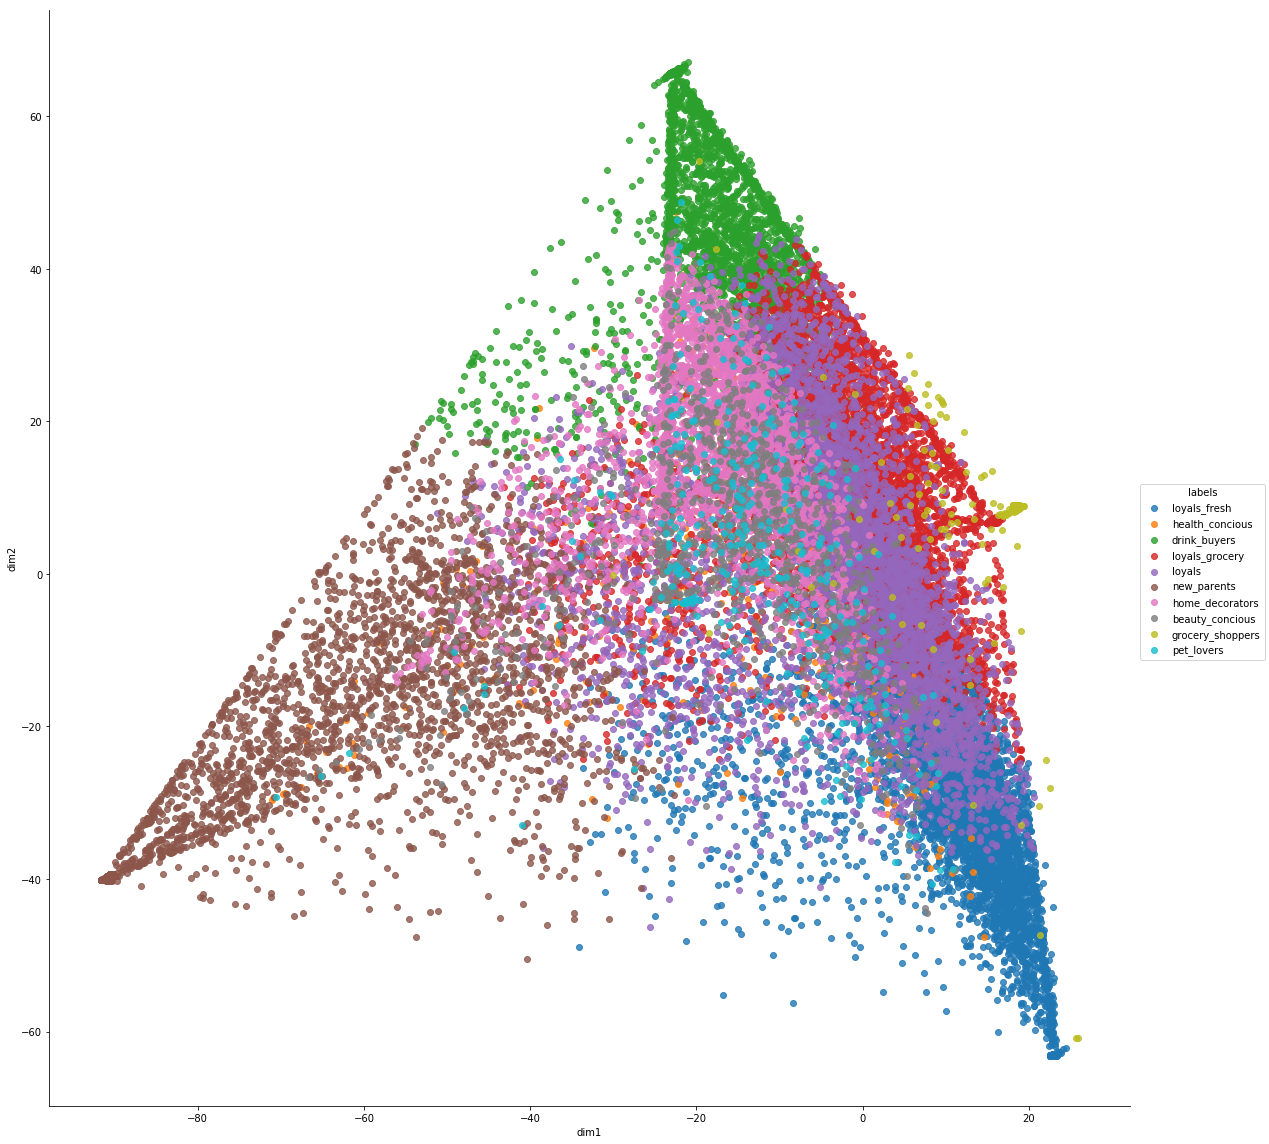

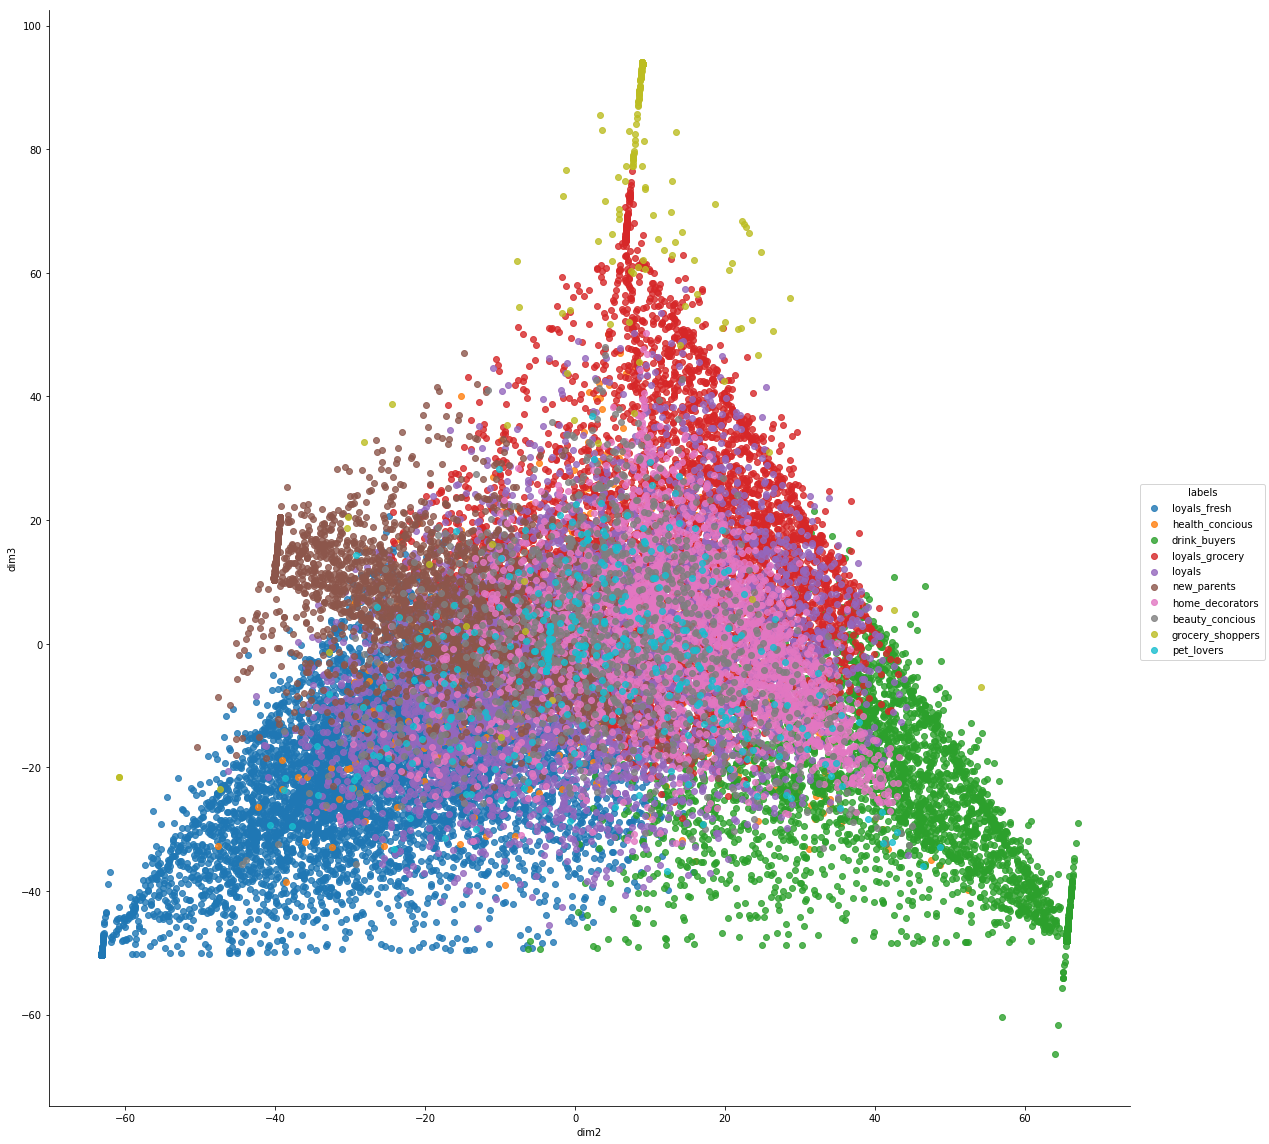

In [77]:
pca_2d_plot_labels(pca, df, frame)

-> From the 2d plot we see that clusters are nicely separated in space.

In [78]:
frame.to_csv('order_segmentation_0.0.csv')

In [79]:
frame.groupby('class')['total_items'].describe()

count       mean        std  min   25%   50%   75%    max
class                                                                       
beauty_concious   1097.0  25.379216  13.722625  6.0  16.0  24.0  31.0  139.0
drink_buyers      3375.0  23.466370  11.719377  6.0  15.0  22.0  30.0   98.0
grocery_shoppers   508.0  46.505906  24.481406  6.0  27.0  46.0  63.0  135.0
health_concious    692.0  25.368497  13.700805  6.0  16.0  23.0  32.0  113.0
home_decorators   2807.0  26.652654  14.015091  6.0  17.0  24.0  33.0  122.0
loyals            5000.0  42.394800  19.521638  7.0  29.0  37.0  51.0  140.0
loyals_fresh      6158.0  38.278500  18.533376  6.0  26.0  34.0  47.0  139.0
loyals_grocery    5559.0  38.055586  18.815442  6.0  26.0  34.0  47.0  134.0
new_parents       2540.0  18.259055  11.166849  6.0  10.0  16.0  23.0  126.0
pet_lovers         365.0  24.726027  15.195846  6.0  15.0  21.0  30.0   98.0

-> The variation of total_items with class is not very sound, all classes of orders have similar number of total item counts.

In [80]:
frame.groupby('class')['discount%'].describe()

count       mean        std    min       25%     50%  \
class                                                                     
beauty_concious   1097.0  11.580046  11.982619  -7.81    2.6800    7.85   
drink_buyers      3375.0   5.623449   7.968055 -65.15    0.6500    3.50   
grocery_shoppers   508.0  93.660669  14.194915  42.08  100.0000  100.00   
health_concious    692.0   5.685405   8.269615  -5.54    0.7600    2.83   
home_decorators   2807.0  12.696199  10.347403 -23.98    4.4950   11.11   
loyals            5000.0   6.502936   6.933782  -8.07    1.8275    4.37   
loyals_fresh      6158.0   5.281983   6.695102   0.00    1.0100    3.04   
loyals_grocery    5559.0   6.055156   7.227221 -11.99    1.4850    3.78   
new_parents       2540.0   8.952535   9.982061 -23.89    1.0600    4.77   
pet_lovers         365.0   7.830795   8.485952 -18.06    1.3100    5.39   

                       75%     max  
class                               
beauty_concious    16.0700   61.86  
drink_buyers        7.7500   66.14  
grocery_shoppers  100.0000  100.00  
health_concious     7.1450   52.49  
home_decorators    18.6100   86.09  
loyals              8.7100   52.45  
loyals_fresh        6.8575   65.10  
loyals_grocery      7.9150   51.90  
new_parents        14.7450   53.29  
pet_lovers         11.8600   42.42

-> The customers who have placed orders on grocery have been seen to enjoy a lot of discount, may be there was a stock clearance sale or a promotional sale olabox.

In [5]:
frame = pd.read_csv('order_segmentation_0.0.csv')

In [15]:
frame['class'].value_counts().sort_values(ascending=False)

loyals_fresh        6158
loyals_grocery      5559
loyals              5000
drink_buyers        3375
home_decorators     2807
new_parents         2540
beauty_concious     1097
health_concious      692
grocery_shoppers     508
pet_lovers           365
Name: class, dtype: int64

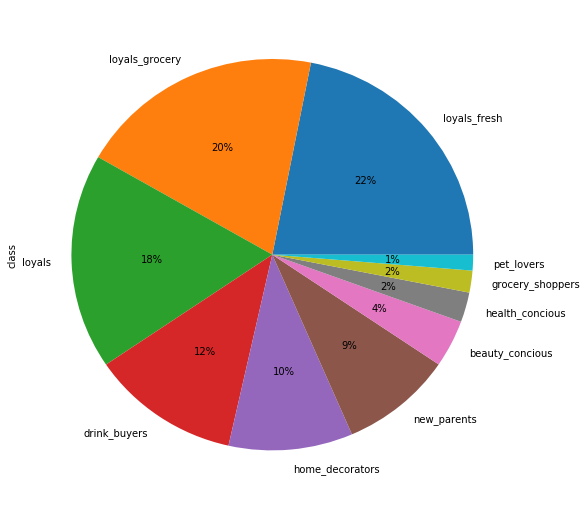

In [16]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()

-> Our hypothesised loyal costomers are placed at the top when it comes to number of orders.<br>
-> Our next hypothesis of drink buyers being potential customers is also subtantiated.<br>
-> Pet lovers are very less in number, olabox should buy less pet products accordingly.<br>
-> When seeing the large discount enjoyed by grocery shoppers in the previous data frame and the less number of grocery shoppers here. They are supposedly customers who brought only on the discount sale.<br>
-> Olabox can actually frame their buying strategies according to these numbers.<br>

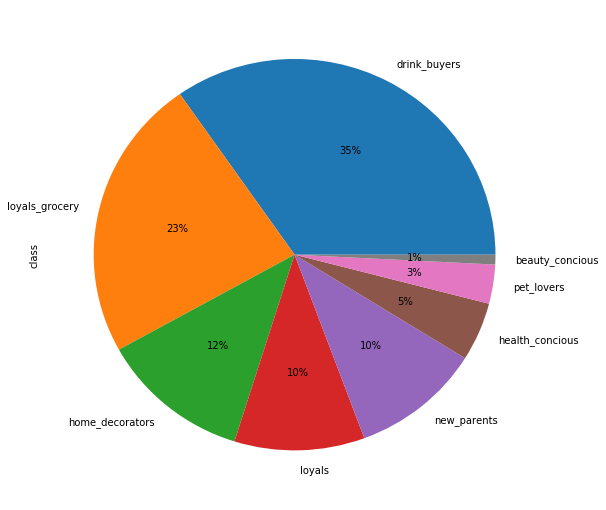

In [18]:
plt.figure(figsize=(9,9))
frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).index)
plt.show()

In [20]:
frame[(frame['discount%']<0).multiply(frame['class']!='drink_buyers')].describe()

Unnamed: 0      customer         order  total_items  discount%  \
count     81.000000     81.000000     81.000000    81.000000  81.000000   
mean   15625.950617   5214.469136  15625.950617    31.320988  -4.152099   
std     9280.915095   3112.784642   9280.915095    20.371443   4.709740   
min     1105.000000    296.000000   1105.000000     6.000000 -23.980000   
25%     6657.000000   2256.000000   6657.000000    16.000000  -5.770000   
50%    15827.000000   5289.000000  15827.000000    26.000000  -2.520000   
75%    24272.000000   8011.000000  24272.000000    40.000000  -0.910000   
max    29734.000000  10113.000000  29734.000000    86.000000  -0.030000   

         weekday       hour      Food%     Fresh%    Drinks%      Home%  \
count  81.000000  81.000000  81.000000  81.000000  81.000000  81.000000   
mean    3.530864  13.654321  25.182840   0.395185  30.732716  19.597160   
std     2.115930   6.504153  21.628512   3.556667  14.179246  18.381239   
min     1.000000   0.000000   0.000000   0.000000   4.470000   0.000000   
25%     2.000000  10.000000   3.840000   0.000000  17.600000   1.000000   
50%     3.000000  14.000000  24.250000   0.000000  29.540000  17.420000   
75%     5.000000  19.000000  37.460000   0.000000  40.890000  31.080000   
max     7.000000  23.000000  78.570000  32.010000  63.690000  74.670000   

         Beauty%    Health%      Baby%      Pets%     labels  
count  81.000000  81.000000  81.000000  81.000000  81.000000  
mean    3.425926   2.552840  15.455185   2.658272   3.814815  
std     6.621533   8.096041  28.721343  10.098877   1.975545  
min     0.000000   0.000000   0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000   0.000000   2.000000  
50%     0.000000   0.000000   0.000000   0.000000   3.000000  
75%     3.980000   0.000000  17.920000   0.000000   6.000000  
max    37.820000  52.570000  86.330000  67.420000   8.000000

-> From the table we can say, even the people in other clusters who had to pay a negative discount have brought a lot drinks.<br>

In [22]:
frame[frame['discount%']<0].shape[0]

124

-> Only 124 among 30k had to pay an extra charge, that's not a pain killer problem.